In [3]:
import pandas as pd 
import numpy as np 
import sklearn as sk 
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos y herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

# --- MODELOS A COMPARAR (ASEGÚRATE DE QUE ESTÉN AQUÍ) ---
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score



In [4]:
# Cargar el dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/cagomezv/Mineria_de_Datos/refs/heads/main/5.Clasificacion/Data/clf_estelar.csv')

In [5]:
df

obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0      19.16573  18.79371    3606       301        2        79  6.543777e+18   
1      21.16812  21.61427    4518       301        5       119  1.176014e+19   
2      19.34857  18.94827    3606       301        2       120  5.152200e+18   
3      20.50454  19.25010    4192       301        3       214  1.030107e+19   
4      15.97711  15.54461    8102       301        3       137  6.891865e+18   
...         ...       ...     ...       ...      ...       ...           ...   
99995  21.30548  20.73569    7778       301        2       581  1.055431e+19   
99996  19.75759  19.41526    7917       301        1       289  8.586351e+18   
99997  17.69034  17.35221    5314       301        4       308  3.112008e+18   
99998  19.07254  18.62482    3650       301        4       131  7.601080e+18   
99999  20.00959  19.28075    3650       301        4        60  8.343152e+18   

        class  redshift  plate    MJD  fiber_ID  
0      GALAXY  0.634794   5812  56354       171  
1      GALAXY  0.779136  10445  58158       427  
2      GALAXY  0.644195   4576  55592       299  
3      GALAXY  0.932346   9149  58039       775  
4      GALAXY  0.116123   6121  56187       842  
...       ...       ...    ...    ...       ...  
99995  GALAXY  0.000000   9374  57749       438  
99996  GALAXY  0.404895   7626  56934       866  
99997  GALAXY  0.143366   2764  54535        74  
99998  GALAXY  0.455040   6751  56368       470  
99999  GALAXY  0.542944   7410  57104       851  

[100000 rows x 18 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [7]:
# Ver valores nulos por columna
print(df.isnull().sum())


obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


### Borrar columnas de identificacion unicas del satelite 

In [8]:
cols_to_drop = ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID']
df_clean = df.drop(columns=cols_to_drop)


print("DataFrame después de eliminar columnas de ID:")
print(df_clean.head())
print("\nColumnas restantes:", df_clean.columns.tolist())


DataFrame después de eliminar columnas de ID:
        alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

    class  redshift  
0  GALAXY  0.634794  
1  GALAXY  0.779136  
2  GALAXY  0.644195  
3  GALAXY  0.932346  
4  GALAXY  0.116123  

Columnas restantes: ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift']


In [9]:
df_clean

alpha      delta         u         g         r         i  \
0      135.689107  32.494632  23.87882  22.27530  20.39501  19.16573   
1      144.826101  31.274185  24.77759  22.83188  22.58444  21.16812   
2      142.188790  35.582444  25.26307  22.66389  20.60976  19.34857   
3      338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454   
4      345.282593  21.183866  19.43718  17.58028  16.49747  15.97711   
...           ...        ...       ...       ...       ...       ...   
99995   39.620709  -2.594074  22.16759  22.97586  21.90404  21.30548   
99996   29.493819  19.798874  22.69118  22.38628  20.45003  19.75759   
99997  224.587407  15.700707  21.16916  19.26997  18.20428  17.69034   
99998  212.268621  46.660365  25.35039  21.63757  19.91386  19.07254   
99999  196.896053  49.464643  22.62171  21.79745  20.60115  20.00959   

              z   class  redshift  
0      18.79371  GALAXY  0.634794  
1      21.61427  GALAXY  0.779136  
2      18.94827  GALAXY  0.644195  
3      19.25010  GALAXY  0.932346  
4      15.54461  GALAXY  0.116123  
...         ...     ...       ...  
99995  20.73569  GALAXY  0.000000  
99996  19.41526  GALAXY  0.404895  
99997  17.35221  GALAXY  0.143366  
99998  18.62482  GALAXY  0.455040  
99999  19.28075  GALAXY  0.542944  

[100000 rows x 9 columns]

## Implementacion de ingenieria de caracteristicas 
Mayor indice menor intensidad 
u ultravioleta 
g verde 
r rojo
i infrarojo cercano 
z redshift infrarojo lejano 
u-g cuanta energia hay en la franja de ultraviolete (alta energia)
 
g-r Temperatura superficial estrellas o poblacion estelar (galaxias)

r-i se sigue enfriando el objeto 

i-z objetos aun mas frios y distantes 


In [10]:

print("\nRealizando ingeniería de características...")

df_featured = df_clean.copy()

# a) Creación de Índices de Color
df_featured['u-g'] = df_featured['u'] - df_featured['g']
df_featured['g-r'] = df_featured['g'] - df_featured['r']
df_featured['r-i'] = df_featured['r'] - df_featured['i']
df_featured['i-z'] = df_featured['i'] - df_featured['z']

print(" - Índices de color (u-g, g-r, r-i, i-z) creados.")


df_featured['redshift_log'] = np.log1p(df_featured['redshift'])

print(" - Característica 'redshift_log' creada.")

# c) (Opcional) Eliminar la columna original de redshift
# Ahora que tenemos 'redshift_log', la columna original 'redshift' es redundante
# y su escala es problemática. Es una buena práctica eliminarla para evitar 
# colinealidad y confusión para el modelo.
df_featured = df_featured.drop(columns=['redshift'])

print(" - Columna 'redshift' original eliminada.")


# --- Ver el resultado ---
print("\nDataFrame con nuevas características:")
print(df_featured.head())
print("\nColumnas finales:", df_featured.columns.tolist())


Realizando ingeniería de características...
 - Índices de color (u-g, g-r, r-i, i-z) creados.
 - Característica 'redshift_log' creada.
 - Columna 'redshift' original eliminada.

DataFrame con nuevas características:
        alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

    class      u-g      g-r      r-i      i-z  redshift_log  
0  GALAXY  1.60352  1.88029  1.22928  0.37202      0.491517  
1  GALAXY  1.94571  0.24744  1.41632 -0.44615      0.576128  
2  GALAXY  2.59918  2.05413  1.26119  0.40030      0.497251  
3  GALAXY -1.63974  2.16494  1.10708  1.25444      0.658735  
4  G

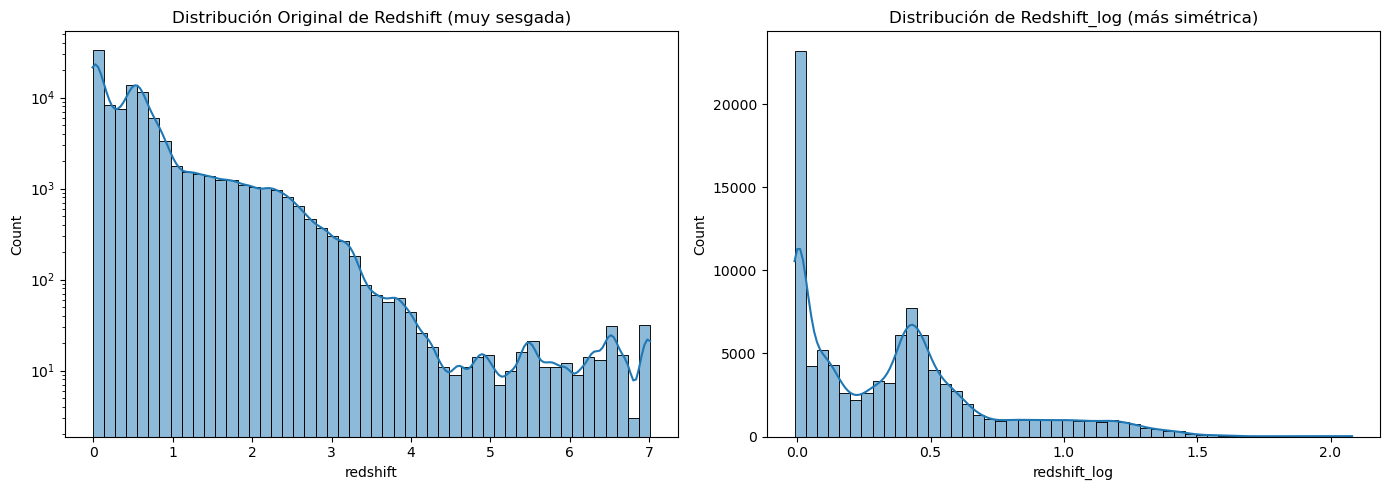

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribución original
sns.histplot(df_clean['redshift'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribución Original de Redshift (muy sesgada)')
axes[0].set_yscale('log') # Escala logarítmica en y para ver la cola

# Distribución transformada
sns.histplot(df_featured['redshift_log'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribución de Redshift_log (más simétrica)')

plt.tight_layout()
plt.show()

ya que los algoritmos son sensibles a las escalas y distribuccione de los datos se busca quitar el sesgo del redshift , con la nueva grafica de se puede ver que se distribuye en 0 las estrellas en 0.5 las galaxias y la ultima curva los QSO

In [12]:

# X ahora proviene del DataFrame con las nuevas características

X = df_featured.drop(columns='class')
y_text = df_featured['class']

le = LabelEncoder()
y = le.fit_transform(y_text)
print(f"Clases codificadas: {dict(zip(le.classes_, le.transform(le.classes_)))}\n")


# === PASO 4: MUESTREO (SUBSAMPLING) ===
SAMPLE_SIZE = 0.30  # Usaremos el 30% de los datos
print(f"--- Creando una muestra del {SAMPLE_SIZE*100}% de los datos ---")

# Tomamos una muestra de X e y, manteniendo la proporción de clases con 'stratify'
X_sample, _, y_sample, _ = train_test_split(
    X, y, 
    train_size=SAMPLE_SIZE, 
    random_state=42, 
    stratify=y ## para que el tamano de la muestra no este sesgado resepecto a la tamano total 
)
print(f"Tamaño de la muestra: {len(X_sample)} filas.\n")



Clases codificadas: {'GALAXY': 0, 'QSO': 1, 'STAR': 2}

--- Creando una muestra del 30.0% de los datos ---
Tamaño de la muestra: 30000 filas.



In [13]:
dividimos el data set solo usaremos el 30% del data set para entrenar los modelos , usando la misma semilla 

SyntaxError: invalid syntax (3245400346.py, line 1)

In [14]:

print("--- Dividiendo la muestra y escalando los datos ---")
# Dividimos la MUESTRA en conjuntos de entrenamiento y prueba (e.g., 70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.3,
    random_state=42,
    stratify=y_sample
)

# Inicializamos y ajustamos el scaler SOLO en los datos de entrenamiento de la muestra
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



--- Dividiendo la muestra y escalando los datos ---


--- Iniciando entrenamiento y evaluación de modelos ---

=== Entrenando: Logistic Regression ===
Accuracy: 0.9588
              precision    recall  f1-score   support

      GALAXY       0.97      0.96      0.97      5350
         QSO       0.94      0.90      0.92      1707
        STAR       0.95      1.00      0.97      1943

    accuracy                           0.96      9000
   macro avg       0.95      0.95      0.95      9000
weighted avg       0.96      0.96      0.96      9000



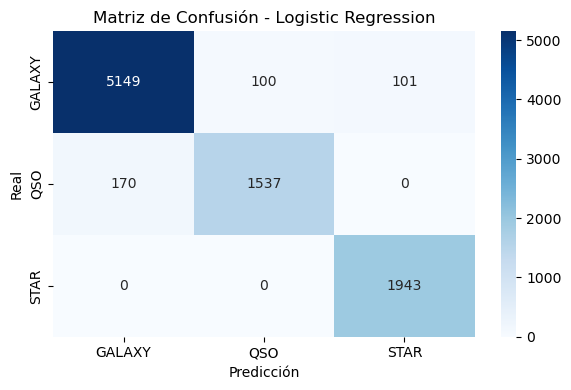


=== Entrenando: KNN ===
Accuracy: 0.9460
              precision    recall  f1-score   support

      GALAXY       0.95      0.96      0.96      5350
         QSO       0.96      0.92      0.94      1707
        STAR       0.93      0.93      0.93      1943

    accuracy                           0.95      9000
   macro avg       0.94      0.94      0.94      9000
weighted avg       0.95      0.95      0.95      9000



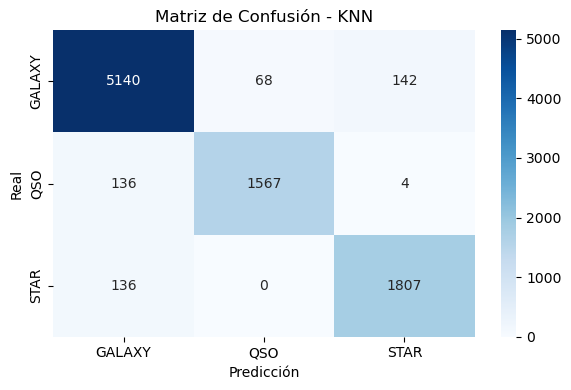


=== Entrenando: Decision Tree ===
Accuracy: 0.9646
              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97      5350
         QSO       0.90      0.92      0.91      1707
        STAR       0.99      1.00      1.00      1943

    accuracy                           0.96      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000



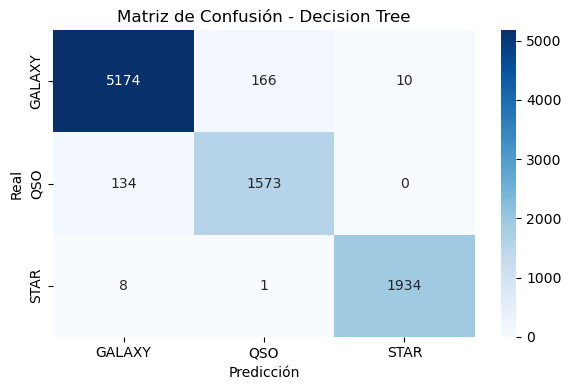


=== Entrenando: Random Forest ===
Accuracy: 0.9771
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98      5350
         QSO       0.96      0.94      0.95      1707
        STAR       0.98      1.00      0.99      1943

    accuracy                           0.98      9000
   macro avg       0.97      0.97      0.97      9000
weighted avg       0.98      0.98      0.98      9000



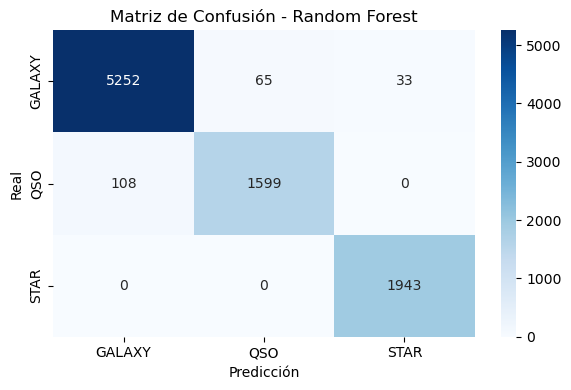


=== Entrenando: Naive Bayes ===
Accuracy: 0.9309
              precision    recall  f1-score   support

      GALAXY       0.97      0.91      0.94      5350
         QSO       0.78      0.92      0.85      1707
        STAR       0.98      0.99      0.98      1943

    accuracy                           0.93      9000
   macro avg       0.91      0.94      0.92      9000
weighted avg       0.94      0.93      0.93      9000



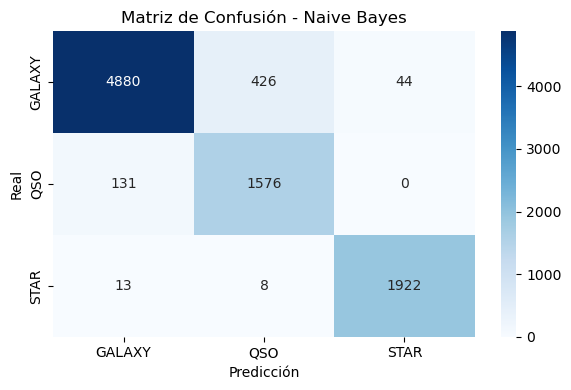


=== Entrenando: SVM ===
Accuracy: 0.9640
              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97      5350
         QSO       0.96      0.92      0.94      1707
        STAR       0.94      0.99      0.97      1943

    accuracy                           0.96      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000



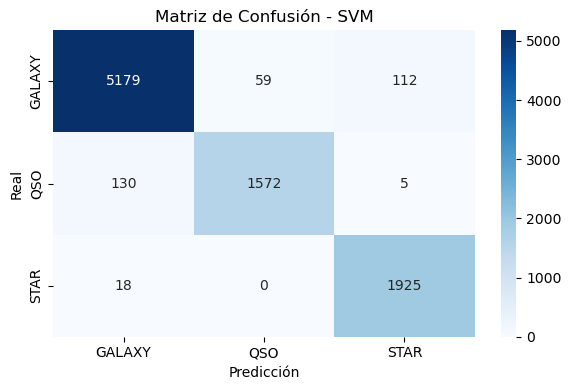


=== Entrenando: Neural Network ===
Accuracy: 0.9744
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98      5350
         QSO       0.96      0.94      0.95      1707
        STAR       0.97      1.00      0.99      1943

    accuracy                           0.97      9000
   macro avg       0.97      0.97      0.97      9000
weighted avg       0.97      0.97      0.97      9000



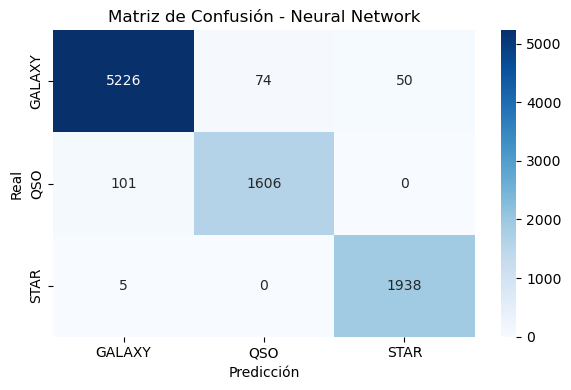



=== Comparación de modelos (entrenados en muestra del 30%) ===


Modelo  Accuracy  F1-score
0        Random Forest  0.977111  0.973675
1       Neural Network  0.974444  0.970936
2                  SVM  0.964000  0.959376
3        Decision Tree  0.964556  0.959325
4  Logistic Regression  0.958778  0.953051
5                  KNN  0.946000  0.940198
6          Naive Bayes  0.930889  0.924060

In [15]:

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

resultados = []

print("--- Iniciando entrenamiento y evaluación de modelos ---")
for name, model in models.items():
    print(f"\n=== Entrenando: {name} ===")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
    f1_macro = report['macro avg']['f1-score']

    resultados.append({
        'Modelo': name,
        'Accuracy': acc,
        'F1-score': f1_macro
    })

    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

# === PASO 7: TABLA FINAL DE COMPARACIÓN ===
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='F1-score', ascending=False).reset_index(drop=True)

print("\n\n=== Comparación de modelos (entrenados en muestra del 30%) ===")
display(df_resultados)

In [17]:
scaler_for_tuning = StandardScaler()
X_sample_scaled = scaler_for_tuning.fit_transform(X_sample)

print(f"Datos de muestra escalados y listos para la búsqueda. Dimensiones: {X_sample_scaled.shape}")

Datos de muestra escalados y listos para la búsqueda. Dimensiones: (30000, 12)


In [18]:
# --- Celda 10: Búsqueda de Hiperparámetros - Random Forest ---
from sklearn.model_selection import GridSearchCV
import time

print("--- Iniciando GridSearchCV para Random Forest (en muestra del 30%) ---")

# Espacio de parámetros a explorar
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Crear el objeto GridSearchCV
# cv=3 es más rápido para el ajuste. 5 es más robusto. Elige según tu paciencia.
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Ajustar a los datos de la muestra
start_time = time.time()
grid_rf.fit(X_sample_scaled, y_sample)
end_time = time.time()

# Guardar los mejores parámetros
best_params_rf = grid_rf.best_params_
print(f"\nMejores parámetros para Random Forest: {best_params_rf}")
print(f"Mejor score de CV (accuracy): {grid_rf.best_score_:.4f}")
print(f"Tiempo de búsqueda: {end_time - start_time:.2f} segundos")

--- Iniciando GridSearchCV para Random Forest (en muestra del 30%) ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Mejores parámetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mejor score de CV (accuracy): 0.9772
Tiempo de búsqueda: 125.84 segundos


In [19]:
# --- Celda 12: Búsqueda de Hiperparámetros - Neural Network ---
print("\n--- Iniciando GridSearchCV para Neural Network (en muestra del 30%) ---")

# Espacio de parámetros a explorar
param_grid_mlp = {
    'hidden_layer_sizes': [(50, 50), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001] # Parámetro de regularización L2
}

grid_mlp = GridSearchCV(MLPClassifier(max_iter=500, random_state=42, early_stopping=True), 
                        param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

start_time = time.time()
grid_mlp.fit(X_sample_scaled, y_sample)
end_time = time.time()

best_params_mlp = grid_mlp.best_params_
print(f"\nMejores parámetros para Neural Network: {best_params_mlp}")
print(f"Mejor score de CV (accuracy): {grid_mlp.best_score_:.4f}")
print(f"Tiempo de búsqueda: {end_time - start_time:.2f} segundos")


--- Iniciando GridSearchCV para Neural Network (en muestra del 30%) ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Mejores parámetros para Neural Network: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50)}
Mejor score de CV (accuracy): 0.9713
Tiempo de búsqueda: 33.81 segundos


In [20]:
# --- Celda 11: Búsqueda de Hiperparámetros - SVM ---
print("\n--- Iniciando GridSearchCV para SVM (en muestra del 30%) ---")
print("Esto puede ser lento...")

# Espacio de parámetros a explorar
# C: Parámetro de regularización.
# gamma: Coeficiente del kernel. 'scale' es un buen valor por defecto.
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf'] # Nos enfocamos en el kernel más potente
}

grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

start_time = time.time()
grid_svm.fit(X_sample_scaled, y_sample)
end_time = time.time()

best_params_svm = grid_svm.best_params_
print(f"\nMejores parámetros para SVM: {best_params_svm}")
print(f"Mejor score de CV (accuracy): {grid_svm.best_score_:.4f}")
print(f"Tiempo de búsqueda: {end_time - start_time:.2f} segundos")


--- Iniciando GridSearchCV para SVM (en muestra del 30%) ---
Esto puede ser lento...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Mejores parámetros para SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor score de CV (accuracy): 0.9688
Tiempo de búsqueda: 32.43 segundos


Una vez encontrados los mejores hiperparametros con gridseaarch , se aplican y se hace validacion cruzada con el 100% de los datos 

In [21]:
# --- Celda de Preparación: Escalar el 100% de los Datos ---

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Asumiendo que 'X' (con feature engineering) y 'y' (codificada) están definidos
print("--- Escalanado el dataset completo (100%) ---")
scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X)

print(f"Datos listos para la validación final. Dimensiones: {X_full_scaled.shape}")

# Asumiendo que tienes los mejores hiperparámetros guardados de la fase anterior
# Ejemplo:
# best_params_rf = {'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
# best_params_svm = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
# best_params_mlp = {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50)}

--- Escalanado el dataset completo (100%) ---
Datos listos para la validación final. Dimensiones: (100000, 12)


In [22]:
# --- Validación Cruzada Final: Random Forest (100% de los datos) ---

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import time

print("--- Iniciando Validación Cruzada para Random Forest ---")

# 1. Definir el modelo con sus mejores hiperparámetros
rf_model_final = RandomForestClassifier(random_state=42, n_jobs=-1, **best_params_rf)

# 2. Realizar la validación cruzada y medir el tiempo
start_time = time.time()
rf_final_scores = cross_val_score(rf_model_final, X_full_scaled, y, cv=5, scoring='accuracy', n_jobs=-1)
end_time = time.time()

# 3. Reportar resultados
print("\n--- Resultados Finales de Random Forest ---")
print(f"Scores de cada fold: {rf_final_scores}")
print(f"Accuracy Promedio (CV): {rf_final_scores.mean():.4f}")
print(f"Desviación Estándar (CV): {rf_final_scores.std():.4f}")
print(f"Tiempo total de ejecución (5 folds): {end_time - start_time:.2f} segundos")

--- Iniciando Validación Cruzada para Random Forest ---

--- Resultados Finales de Random Forest ---
Scores de cada fold: [0.97925 0.97905 0.97795 0.98    0.978  ]
Accuracy Promedio (CV): 0.9788
Desviación Estándar (CV): 0.0008
Tiempo total de ejecución (5 folds): 28.89 segundos


In [23]:
# --- Validación Cruzada Final: Neural Network (100% de los datos) ---

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import time

print("--- Iniciando Validación Cruzada para Neural Network ---")
print("Esto puede tardar un tiempo considerable...")

# 1. Definir el modelo con sus mejores hiperparámetros
mlp_model_final = MLPClassifier(random_state=42, **best_params_mlp)

# 2. Realizar la validación cruzada y medir el tiempo
start_time = time.time()
mlp_final_scores = cross_val_score(mlp_model_final, X_full_scaled, y, cv=5, scoring='accuracy', n_jobs=-1)
end_time = time.time()

# 3. Reportar resultados
print("\n--- Resultados Finales de Neural Network ---")
print(f"Scores de cada fold: {mlp_final_scores}")
print(f"Accuracy Promedio (CV): {mlp_final_scores.mean():.4f}")
print(f"Desviación Estándar (CV): {mlp_final_scores.std():.4f}")
print(f"Tiempo total de ejecución (5 folds): {end_time - start_time:.2f} segundos")

--- Iniciando Validación Cruzada para Neural Network ---
Esto puede tardar un tiempo considerable...

--- Resultados Finales de Neural Network ---
Scores de cada fold: [0.9739  0.97385 0.97235 0.9724  0.97385]
Accuracy Promedio (CV): 0.9733
Desviación Estándar (CV): 0.0007
Tiempo total de ejecución (5 folds): 67.86 segundos


In [24]:
# --- Validación Cruzada Final: SVM (100% de los datos) ---

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import time

print("--- Iniciando Validación Cruzada para SVM ---")
print("Este será probablemente el proceso más lento...")

# 1. Definir el modelo con sus mejores hiperparámetros
svm_model_final = SVC(random_state=42, **best_params_svm)

# 2. Realizar la validación cruzada y medir el tiempo
start_time = time.time()
svm_final_scores = cross_val_score(svm_model_final, X_full_scaled, y, cv=5, scoring='accuracy', n_jobs=-1)
end_time = time.time()

# 3. Reportar resultados
print("\n--- Resultados Finales de SVM ---")
print(f"Scores de cada fold: {svm_final_scores}")
print(f"Accuracy Promedio (CV): {svm_final_scores.mean():.4f}")
print(f"Desviación Estándar (CV): {svm_final_scores.std():.4f}")
print(f"Tiempo total de ejecución (5 folds): {end_time - start_time:.2f} segundos")

--- Iniciando Validación Cruzada para SVM ---
Este será probablemente el proceso más lento...

--- Resultados Finales de SVM ---
Scores de cada fold: [0.96935 0.9697  0.9691  0.97105 0.9694 ]
Accuracy Promedio (CV): 0.9697
Desviación Estándar (CV): 0.0007
Tiempo total de ejecución (5 folds): 58.43 segundos


--- Generando Curvas de Aprendizaje ---

Generando curva para Random Forest...


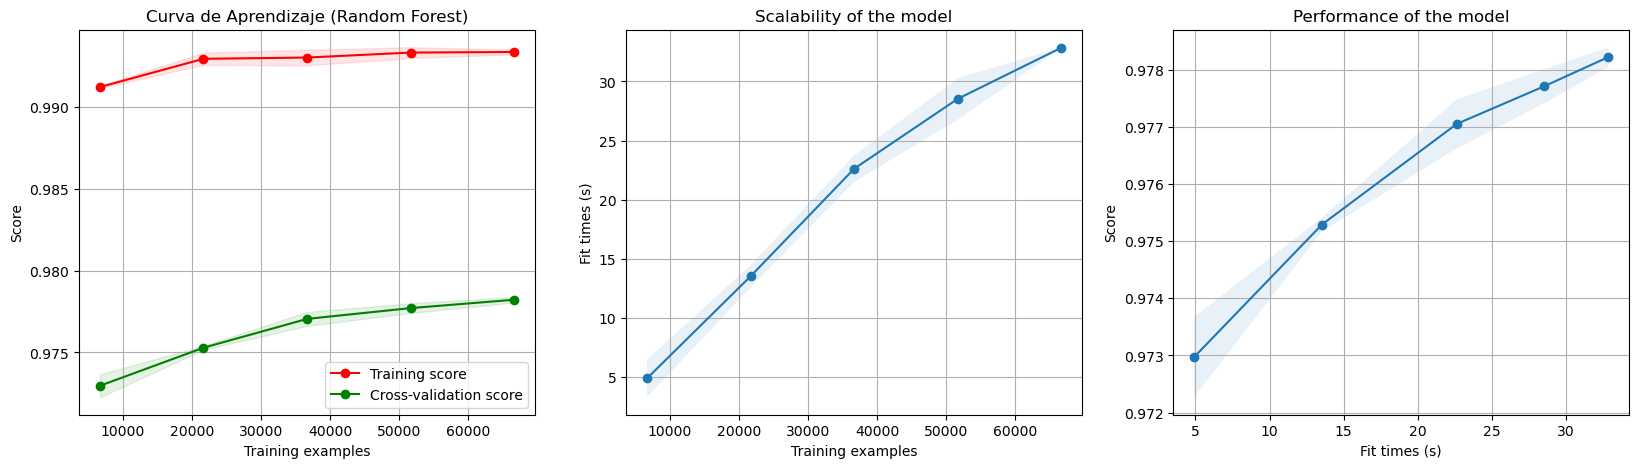


Generando curva para Neural Network...


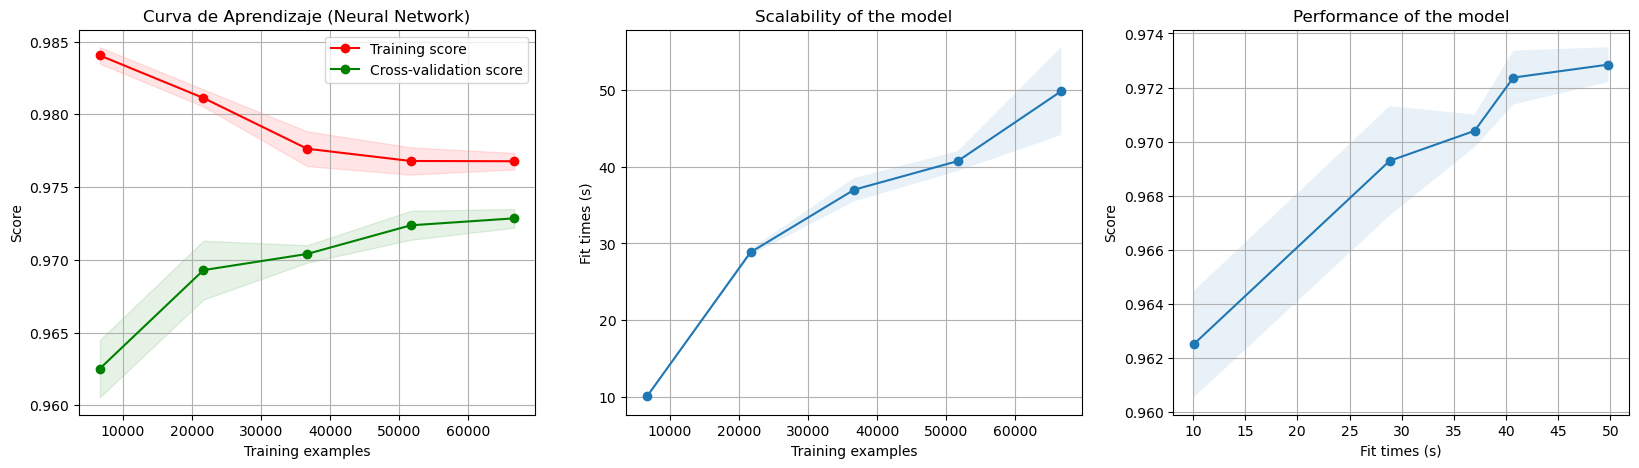


Generando curva para SVM (en una muestra del 70% para acelerar)...


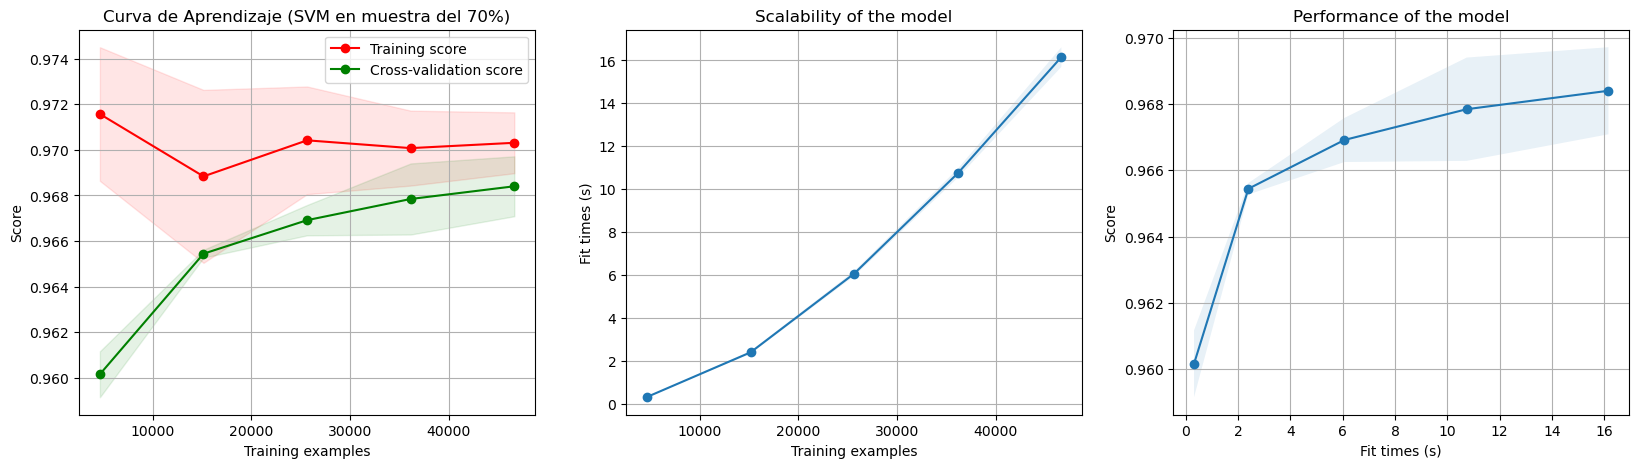

In [26]:
# --- Celda Final: Curvas de Aprendizaje Comparativas ---

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import time

# --- 1. Función Auxiliar para Graficar las Curvas de Aprendizaje ---
# Esta función reutilizable nos ahorrará mucho código.
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Genera 3 plots: la curva de aprendizaje, el tiempo de escalado y el score de escalado.
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        return_times=True, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot de la curva de aprendizaje
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot de escalabilidad del tiempo de entrenamiento
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("Fit times (s)")
    axes[1].set_title("Scalability of the model")

    # Plot de rendimiento vs tiempo de entrenamiento
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("Fit times (s)")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# --- 2. Definir los Modelos Optimizados ---
# Usamos los diccionarios con los mejores hiperparámetros que ya tienes
rf_model_final = RandomForestClassifier(random_state=42, n_jobs=-1, **best_params_rf)
mlp_model_final = MLPClassifier(random_state=42, **best_params_mlp)
svm_model_final = SVC(random_state=42, **best_params_svm)

# --- 3. Generar las Curvas ---
# Usaremos cv=3 para que el proceso sea más rápido.
CV_FOLDS_LC = 3

print("--- Generando Curvas de Aprendizaje ---")

# Para Random Forest (en el 100% de los datos)
print("\nGenerando curva para Random Forest...")
plot_learning_curve(rf_model_final, "Curva de Aprendizaje (Random Forest)", X_full_scaled, y, cv=CV_FOLDS_LC)
plt.show()

# Para Neural Network (en el 100% de los datos)
print("\nGenerando curva para Neural Network...")
plot_learning_curve(mlp_model_final, "Curva de Aprendizaje (Neural Network)", X_full_scaled, y, cv=CV_FOLDS_LC)
plt.show()

# Para SVM (en una muestra grande para ahorrar tiempo)
print("\nGenerando curva para SVM (en una muestra del 70% para acelerar)...")
# Usaremos los datos del split 70/30 que preparamos antes.
# Asumiendo que X_train_scaled y y_train están disponibles de esa preparación.
# Si no, crea una muestra aquí.
X_sample_svm, _, y_sample_svm, _ = train_test_split(X_full_scaled, y, train_size=0.7, stratify=y, random_state=42)
plot_learning_curve(svm_model_final, "Curva de Aprendizaje (SVM en muestra del 70%)", X_sample_svm, y_sample_svm, cv=CV_FOLDS_LC)
plt.show()

--- Calculando la Matriz de Correlación de Spearman ---


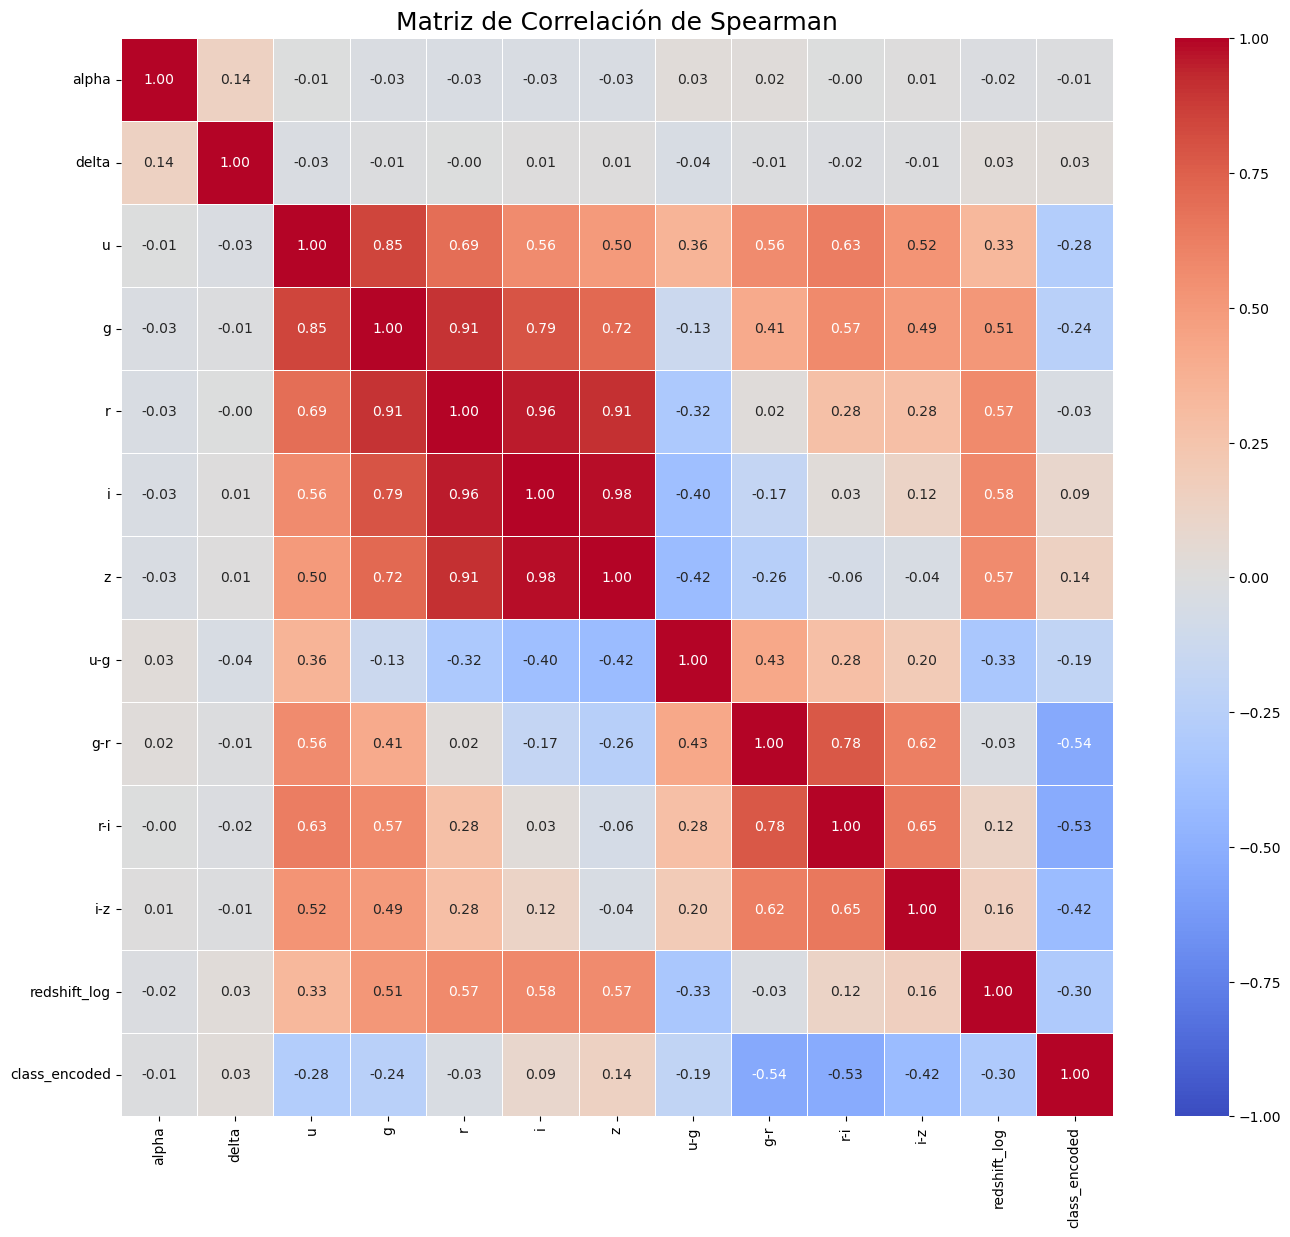

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# --- Preparación de los Datos para la Correlación ---

# Asumiendo que tienes tu DataFrame con ingeniería de características 'df_featured'
# y el LabelEncoder 'le' ya ajustado.

# Crear una copia para el análisis de correlación
df_corr = df_featured.copy()

# Necesitamos la columna 'class' en formato numérico para incluirla en la matriz.
# Usaremos el LabelEncoder que ya teníamos.
df_corr['class_encoded'] = le.transform(df_corr['class'])

# Eliminamos la columna de texto original 'class' para que la matriz sea puramente numérica.
df_corr = df_corr.drop(columns=['class'])


# --- Cálculo y Visualización de la Matriz de Correlación de Spearman ---

print("--- Calculando la Matriz de Correlación de Spearman ---")
# Usamos method='spearman' para calcular la correlación de rango.
corr_matrix_spearman = df_corr.corr(method='spearman')

# Crear el mapa de calor para visualizar la matriz
plt.figure(figsize=(16, 14))
sns.heatmap(
    corr_matrix_spearman,
    annot=True,         # Muestra los valores numéricos en cada celda
    fmt='.2f',          # Formatea los números a dos decimales
    cmap='coolwarm',    # Elige un mapa de color divergente
    linewidths=.5,      # Añade líneas delgadas entre las celdas
    vmin=-1, vmax=1     # Fija el rango de la barra de color de -1 a 1
)
plt.title('Matriz de Correlación de Spearman', fontsize=18)
plt.show()

## Sondeo como fue la cobertura del telescopio de observacion 

footprint , cubre area especifica del cielo que permite la observacion mas clara del espacio 
menos polvo galactico entre 100 a 250 grados alpha polo norte galactico , las otras huellas cubre en el sur 


las galaxias forman cumulos o lineas causado por la gravedad ,generando vacios 

las estrellas estan distribuidos de manera mas uniforme sobre  y aleatoria 

los quasares son objetos mas antiguos , a estas distancias el universo era mas homogeneo, no se habian formado las galaxias grandes , por tanto se espera que su distribuccion sea mas aleatoria 

Creando mapa del cielo con 100000 objetos reales...
Primeras filas del DataFrame a visualizar:
        alpha      delta   class
0  135.689107  32.494632  GALAXY
1  144.826101  31.274185  GALAXY
2  142.188790  35.582444  GALAXY
3  338.741038  -0.402828  GALAXY
4  345.282593  21.183866  GALAXY


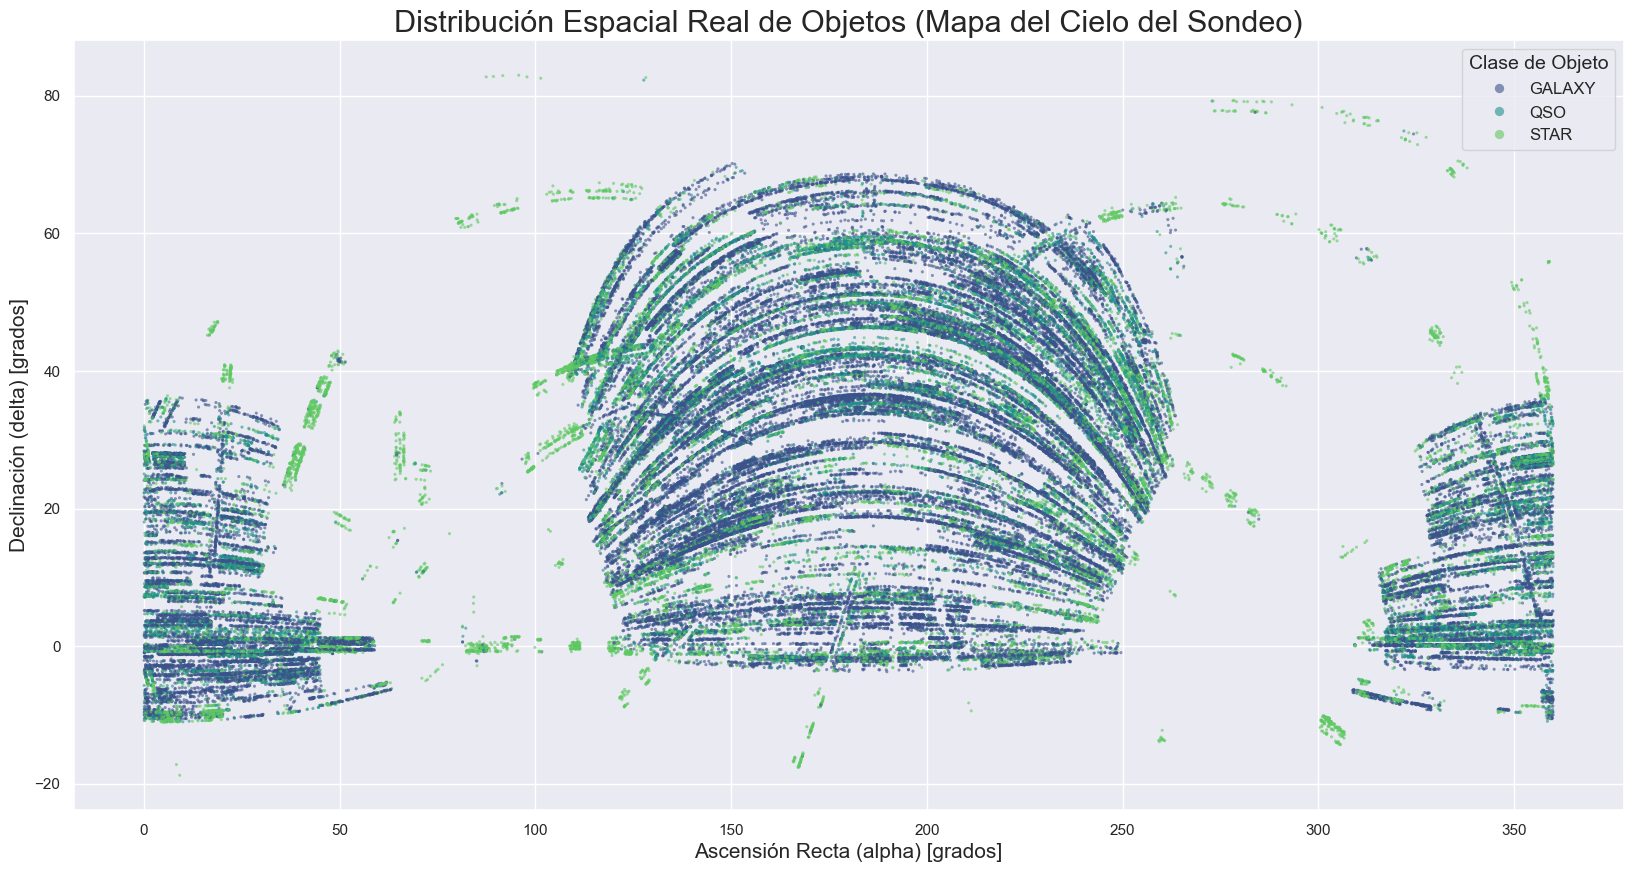

In [28]:
# --- 0. PREPARACIÓN E IMPORTACIONES ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegúrate de que tu DataFrame 'df_featured' está cargado en memoria.
# Este DataFrame debe contener las columnas: 'alpha', 'delta' y 'class'.
# Si no, carga tus datos aquí. Por ejemplo:
# df_featured = pd.read_csv('tu_archivo_de_datos.csv') 

# --- INICIO DEL CÓDIGO DE VISUALIZACIÓN ---

print(f"Creando mapa del cielo con {len(df_featured)} objetos reales...")
print("Primeras filas del DataFrame a visualizar:")
print(df_featured[['alpha', 'delta', 'class']].head())

# --- PRO TIP: Manejo de Datasets Grandes (Opcional, pero recomendado) ---
# Tu dataset tiene ~100,000 puntos. Graficarlos todos puede ser lento y
# resultar en un gráfico muy denso ("overplotting").
# Una buena práctica es visualizar una muestra aleatoria para ver la estructura.
# Si el gráfico es muy lento, descomenta y usa esta sección.

# n_sample = 25000  # Elige un número de puntos a graficar
# df_plot = df_featured.sample(n=n_sample, random_state=42)
# print(f"\nVisualizando una muestra de {n_sample} objetos para mayor claridad y rapidez.")

# Si prefieres graficar todo el dataset, usa la siguiente línea:
df_plot = df_featured

# --------------------------------------------------------------------------

# Configurar el estilo del gráfico
sns.set_theme(style="darkgrid")

# Crear la figura y los ejes
plt.figure(figsize=(20, 10)) # Aumentamos el tamaño para un mapa detallado

# Crear el gráfico de dispersión (scatter plot)
# x -> Ascensión Recta (alpha)
# y -> Declinación (delta)
# hue -> Colorea los puntos según la columna 'class'
# s -> Tamaño de los puntos. Muy pequeño para datasets grandes.
# alpha -> Transparencia para ver zonas de alta densidad.
scatter_plot = sns.scatterplot(
    data=df_plot,      # Usamos nuestro DataFrame real (o la muestra)
    x='alpha', 
    y='delta', 
    hue='class',
    palette='viridis', # Una paleta de colores bonita
    s=5,               # Puntos más pequeños para evitar saturación
    alpha=0.6,         # Un poco de transparencia
    edgecolor='none'
)

# Añadir títulos y etiquetas para mayor claridad
plt.title('Distribución Espacial Real de Objetos (Mapa del Cielo del Sondeo)', fontsize=22)
plt.xlabel('Ascensión Recta (alpha) [grados]', fontsize=15)
plt.ylabel('Declinación (delta) [grados]', fontsize=15)

# Mejorar la leyenda
legend = plt.legend(title='Clase de Objeto', markerscale=3, fontsize=12)
legend.get_title().set_fontsize('14')

# Mostrar el gráfico
plt.show()

Preparando subconjuntos de datos para visualización...
Subconjuntos 'df_stars' y 'df_extragalactic' creados.

--- Generando Gráficos de Distribución (Histogramas) ---


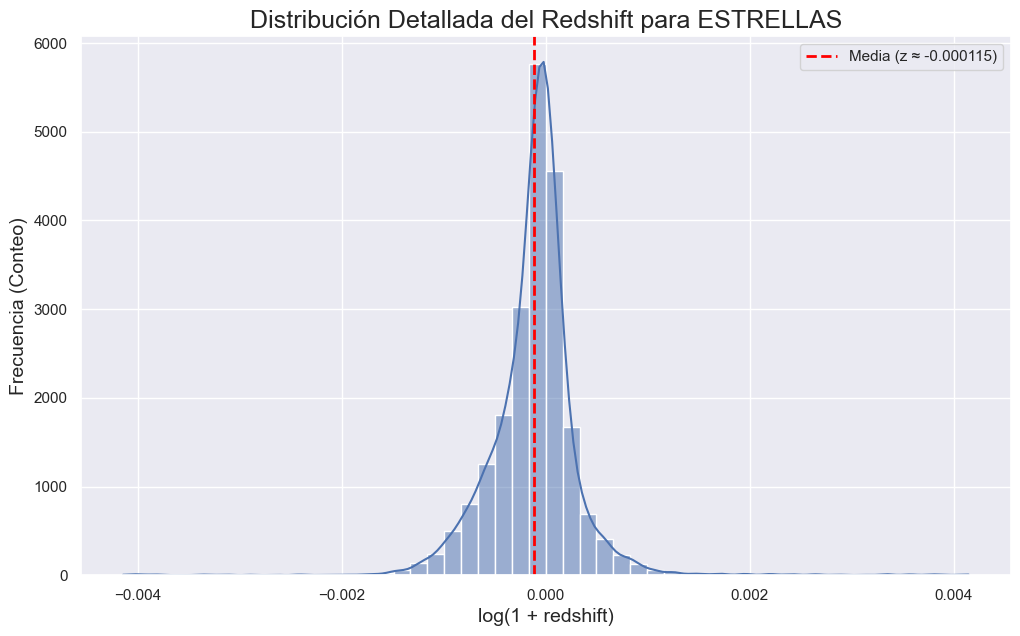

C:\Users\kevin\AppData\Local\Temp\ipykernel_18748\1969551144.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Clase')


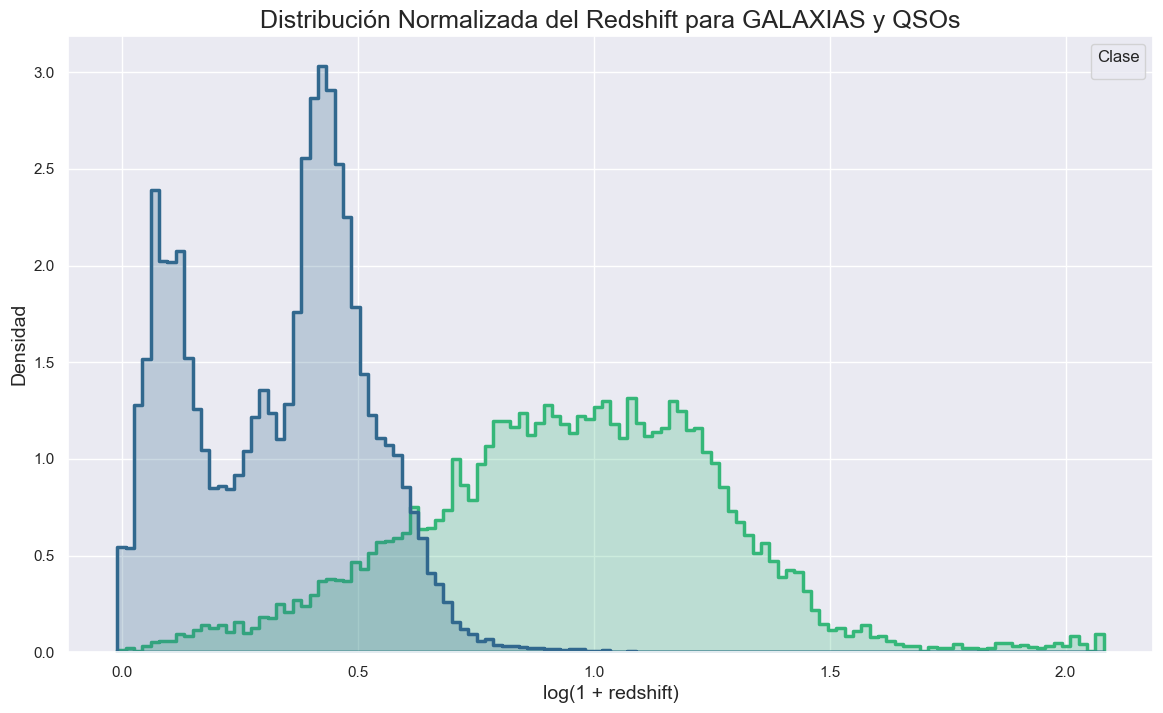


--- Generando Gráficos de Violín (Violin Plots) ---


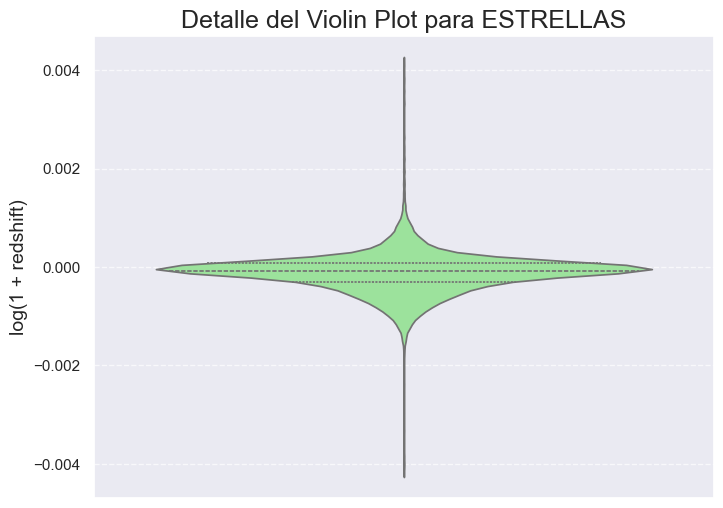

C:\Users\kevin\AppData\Local\Temp\ipykernel_18748\1969551144.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


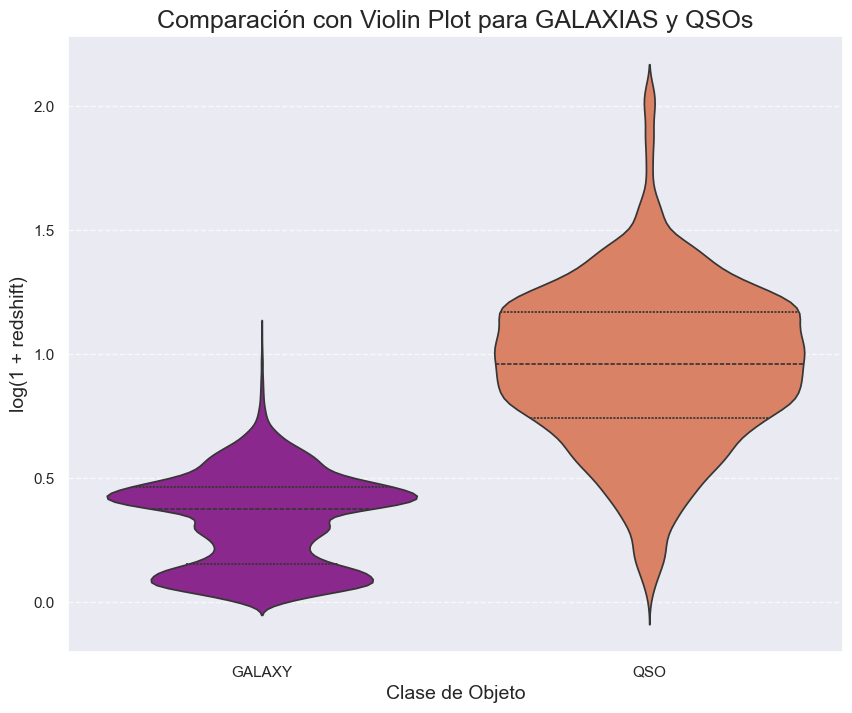

In [29]:
# --- 0. PREPARACIÓN E IMPORTACIONES ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Asegúrate de que tus DataFrames 'df_featured' y 'df_clean' están cargados.
# df_featured contiene 'redshift_log' y 'class'
# df_clean contiene el 'redshift' original y 'class'

# --- 1. FILTRADO DE DATOS (Hacemos esto una vez para reutilizarlo) ---
print("Preparando subconjuntos de datos para visualización...")

# DataFrame solo con estrellas
df_stars = df_featured[df_featured['class'] == 'STAR']
# DataFrame con objetos extragalácticos (Galaxias y QSOs)
df_extragalactic = df_featured[df_featured['class'].isin(['GALAXY', 'QSO'])]

print("Subconjuntos 'df_stars' y 'df_extragalactic' creados.")


# =========================================================================
#  GRÁFICO 1: HISTOGRAMAS / GRÁFICOS DE DENSIDAD
# =========================================================================
print("\n--- Generando Gráficos de Distribución (Histogramas) ---")

# --- Gráfico 1.1: Detalle para ESTRELLAS ---
plt.figure(figsize=(12, 7))
mean_redshift_stars = df_clean[df_clean['class'] == 'STAR']['redshift'].mean()
sns.histplot(data=df_stars, x='redshift_log', bins=50, kde=True)
plt.axvline(
    x=np.log1p(mean_redshift_stars),
    color='red', linestyle='--', linewidth=2,
    label=f'Media (z ≈ {mean_redshift_stars:.6f})'
)
plt.title('Distribución Detallada del Redshift para ESTRELLAS', fontsize=18)
plt.xlabel('log(1 + redshift)', fontsize=14)
plt.ylabel('Frecuencia (Conteo)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# --- Gráfico 1.2: Comparación para GALAXIAS y QSOs ---
plt.figure(figsize=(14, 8))
sns.histplot(
    data=df_extragalactic, x='redshift_log', hue='class',
    stat='density', common_norm=False, element='step',
    linewidth=2.5, palette='viridis'
)
plt.title('Distribución Normalizada del Redshift para GALAXIAS y QSOs', fontsize=18)
plt.xlabel('log(1 + redshift)', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.legend(title='Clase')
plt.grid(True)
plt.show()



# =========================================================================
#  GRÁFICO 3: DIAGRAMAS DE VIOLÍN (VIOLIN PLOTS)
# =========================================================================
print("\n--- Generando Gráficos de Violín (Violin Plots) ---")

# --- Gráfico 3.1: Detalle para ESTRELLAS ---
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_stars, y='redshift_log', inner='quartile', color='lightgreen')
plt.title('Detalle del Violin Plot para ESTRELLAS', fontsize=18)
plt.ylabel('log(1 + redshift)', fontsize=14)
plt.xticks([])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Gráfico 3.2: Comparación para GALAXIAS y QSOs ---
plt.figure(figsize=(10, 8))
sns.violinplot(
    data=df_extragalactic, x='class', y='redshift_log',
    order=['GALAXY', 'QSO'], inner='quartile', palette='plasma'
)
plt.title('Comparación con Violin Plot para GALAXIAS y QSOs', fontsize=18)
plt.xlabel('Clase de Objeto', fontsize=14)
plt.ylabel('log(1 + redshift)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Usando una muestra de 30000 objetos para el primer gráfico.

--- Generando Diagrama Color-Magnitud para todas las clases ---


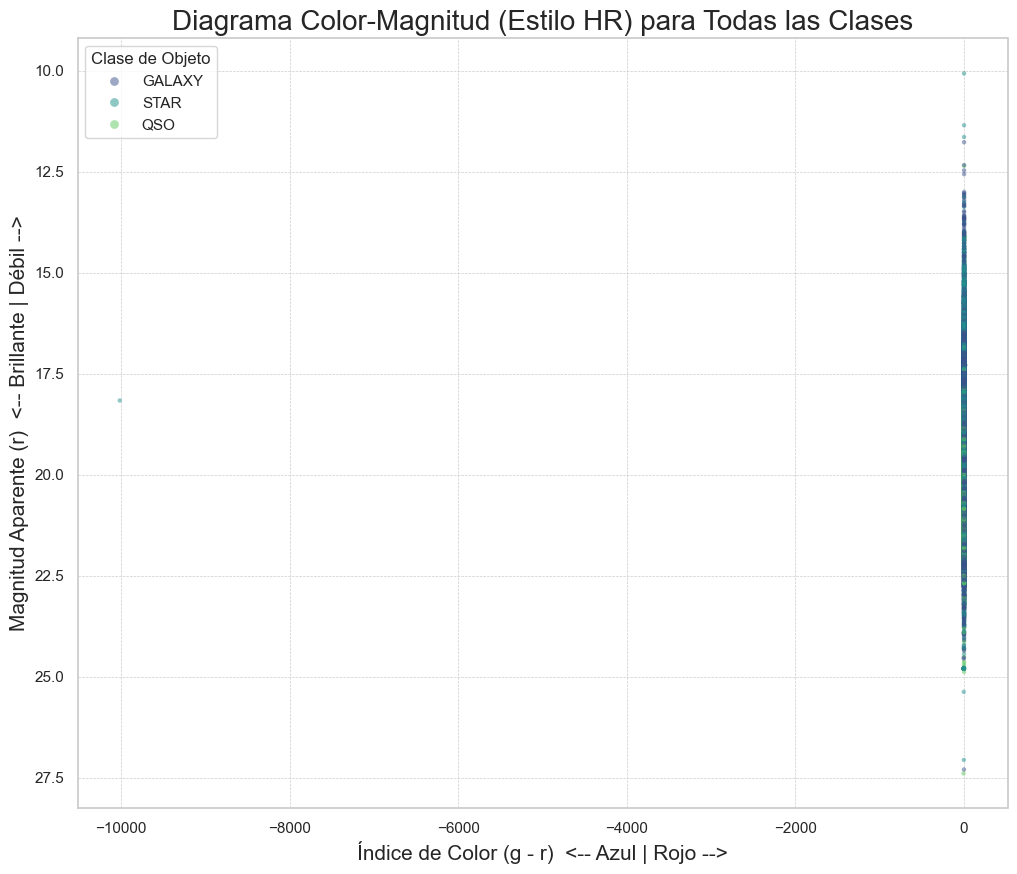

In [30]:
# --- 0. PREPARACIÓN E IMPORTACIONES ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Asumo que tu DataFrame 'df_featured' está cargado.
# Necesitamos las columnas 'r', 'g-r' y 'class'.

# --- PRO TIP: Usar una muestra para el primer gráfico ---
# Graficar 100,000 puntos en un scatter plot es lento y crea una "mancha".
# Una muestra aleatoria revela la estructura sin saturar el gráfico.
n_sample = 30000
df_sample = df_featured.sample(n=n_sample, random_state=42)
print(f"Usando una muestra de {n_sample} objetos para el primer gráfico.")

# =========================================================================
#  GRÁFICO 1: CMD CON TODAS LAS CLASES DE OBJETOS
# =========================================================================
print("\n--- Generando Diagrama Color-Magnitud para todas las clases ---")

plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

scatter_plot = sns.scatterplot(
    data=df_sample, 
    x='g-r', 
    y='r', 
    hue='class', 
    palette='viridis',
    s=10, 
    alpha=0.5,
    edgecolor='none'
)

# --- INVERTIMOS EL EJE Y (CRUCIAL) ---
plt.gca().invert_yaxis()

plt.title('Diagrama Color-Magnitud (Estilo HR) para Todas las Clases', fontsize=20)
plt.xlabel('Índice de Color (g - r)  <-- Azul | Rojo -->', fontsize=15)
plt.ylabel('Magnitud Aparente (r)  <-- Brillante | Débil -->', fontsize=15)
plt.legend(title='Clase de Objeto', markerscale=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()



In [31]:
# Vamos a encontrar la fila que corresponde a ese outlier
outlier_row = df_featured.loc[df_featured['g-r'].idxmin()]

print("--- Fila del Outlier Extremo ---")
print(outlier_row)

--- Fila del Outlier Extremo ---
alpha            224.006526
delta             -0.624304
u                   -9999.0
g                   -9999.0
r                   18.1656
i                  18.01675
z                   -9999.0
class                  STAR
u-g                     0.0
g-r             -10017.1656
r-i                 0.14885
i-z             10017.01675
redshift_log       0.000089
Name: 79543, dtype: object


Quitar del data set de tratamiento estos datos atipicos 

In [32]:
import numpy as np
import pandas as pd

# Asumo que df_featured está cargado

# --- ANÁLISIS ESTADÍSTICO DE OUTLIERS PARA 'g-r' ---

# Seleccionamos la columna de interés
color_gr = df_featured['g-r']

# 1. Calcular Q1, Q3 e IQR
Q1 = color_gr.quantile(0.25)
Q3 = color_gr.quantile(0.75)
IQR = Q3 - Q1

# 2. Calcular los límites para outliers
# Usaremos el factor 1.5 (estándar) y también 3.0 (para outliers extremos)
limite_inferior_std = Q1 - 1.5 * IQR
limite_superior_std = Q3 + 1.5 * IQR

limite_inferior_ext = Q1 - 3.0 * IQR
limite_superior_ext = Q3 + 3.0 * IQR

print("--- Análisis Estadístico de Outliers (Método IQR) para 'g-r' ---")
print(f"Primer Cuartil (Q1): {Q1:.4f}")
print(f"Tercer Cuartil (Q3): {Q3:.4f}")
print(f"Rango Intercuartílico (IQR): {IQR:.4f}")
print("-" * 30)
print(f"Límite Inferior (1.5 * IQR): {limite_inferior_std:.4f}")
print(f"Límite Superior (1.5 * IQR): {limite_superior_std:.4f}")
print("-" * 30)
print(f"Límite Inferior Extremo (3.0 * IQR): {limite_inferior_ext:.4f}")
print(f"Límite Superior Extremo (3.0 * IQR): {limite_superior_ext:.4f}")

--- Análisis Estadístico de Outliers (Método IQR) para 'g-r' ---
Primer Cuartil (Q1): 0.3798
Tercer Cuartil (Q3): 1.5780
Rango Intercuartílico (IQR): 1.1982
------------------------------
Límite Inferior (1.5 * IQR): -1.4175
Límite Superior (1.5 * IQR): 3.3753
------------------------------
Límite Inferior Extremo (3.0 * IQR): -3.2148
Límite Superior Extremo (3.0 * IQR): 5.1725



--- Limpiando datos de valores de color no físicos ---
Se eliminaron 510 puntos con valores de color extremos.
Graficando con 99490 puntos limpios.

--- Generando Diagrama Color-Magnitud (CORREGIDO) para todas las clases ---


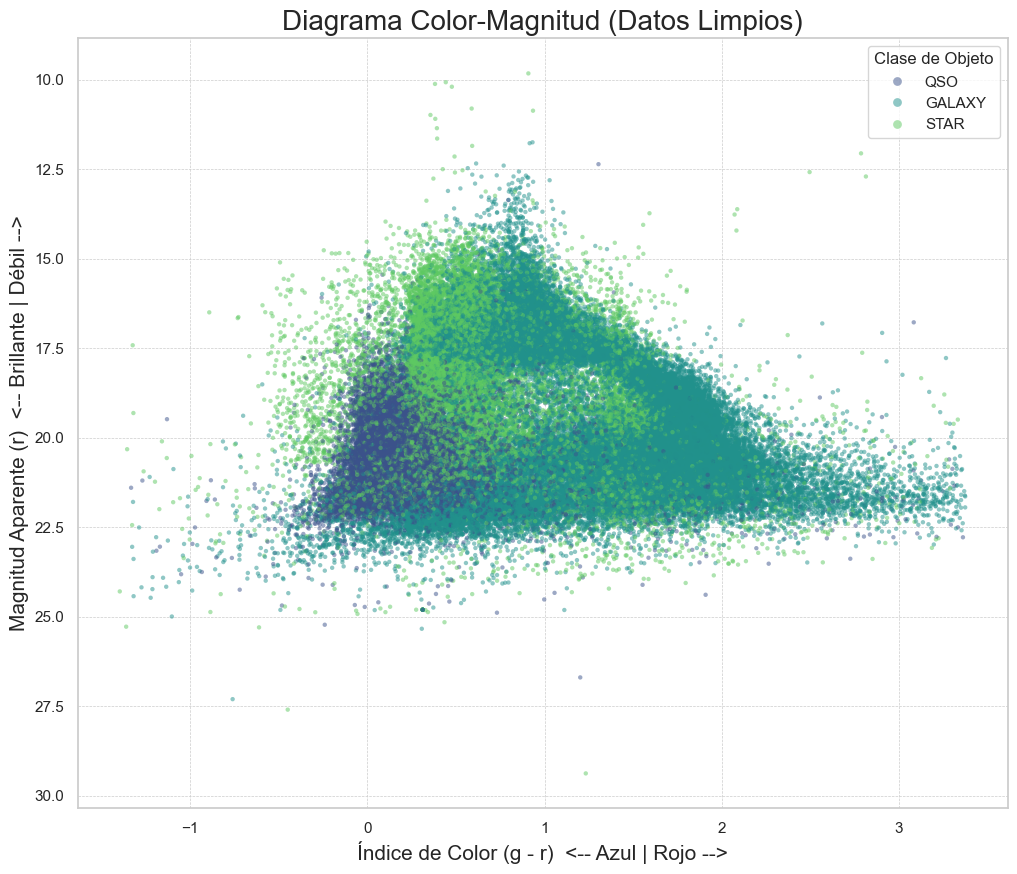


--- Generando Diagrama Color-Magnitud detallado para ESTRELLAS (Datos Limpios) ---


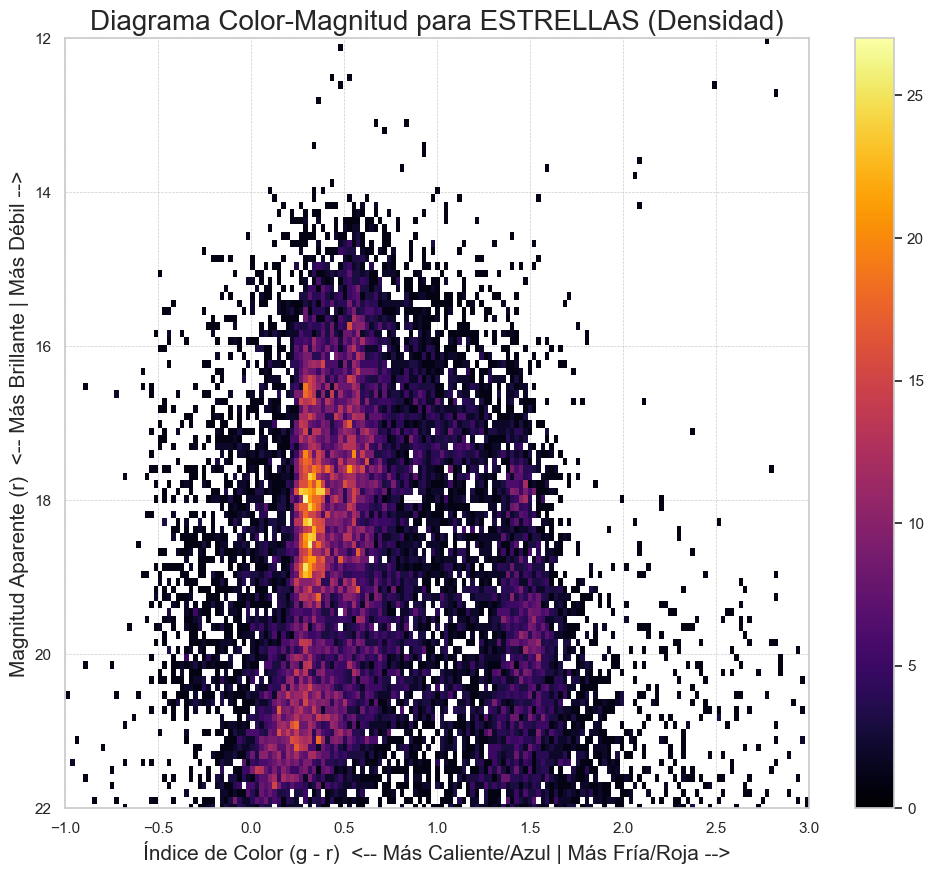

In [33]:
# --- 0. PREPARACIÓN E IMPORTACIONES ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# =========================================================================
#  NUEVO PASO: LIMPIEZA DE DATOS PARA EL DIAGRAMA CMD
# =========================================================================
print("\n--- Limpiando datos de valores de color no físicos ---")

# Definimos un rango razonable para los índices de color. 
# Los valores fuera de este rango son casi con seguridad errores.
color_min = -1.4175
color_max = 3.3753

df_clean_cmd = df_featured[(df_featured['g-r'] > color_min) & (df_featured['g-r'] < color_max)]

# Informamos cuántos puntos se eliminaron
original_count = len(df_featured)
clean_count = len(df_clean_cmd)
print(f"Se eliminaron {original_count - clean_count} puntos con valores de color extremos.")
print(f"Graficando con {clean_count} puntos limpios.")


# --- Usamos una muestra del DataFrame LIMPIO para el primer gráfico ---
n_sample = 100000
# Asegurarnos de no pedir una muestra más grande que los datos limpios
if clean_count < n_sample:
    n_sample = clean_count
df_sample = df_clean_cmd.sample(n=n_sample, random_state=42)


# =========================================================================
#  GRÁFICO 1 (CORREGIDO): CMD CON TODAS LAS CLASES
# =========================================================================
print("\n--- Generando Diagrama Color-Magnitud (CORREGIDO) para todas las clases ---")

plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

sns.scatterplot(
    data=df_sample,  # <--- Usando la muestra de datos limpios
    x='g-r', 
    y='r', 
    hue='class', 
    palette='viridis',
    s=10, 
    alpha=0.5,
    edgecolor='none'
)

plt.gca().invert_yaxis()
plt.title('Diagrama Color-Magnitud (Datos Limpios)', fontsize=20)
plt.xlabel('Índice de Color (g - r)  <-- Azul | Rojo -->', fontsize=15)
plt.ylabel('Magnitud Aparente (r)  <-- Brillante | Débil -->', fontsize=15)
plt.legend(title='Clase de Objeto', markerscale=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# =========================================================================
#  GRÁFICO 2 (CORREGIDO): CMD ENFOCADO SOLO EN LAS ESTRELLAS
# =========================================================================
print("\n--- Generando Diagrama Color-Magnitud detallado para ESTRELLAS (Datos Limpios) ---")

df_stars_clean = df_clean_cmd[df_clean_cmd['class'] == 'STAR']

plt.figure(figsize=(12, 10))
sns.histplot(
    data=df_stars_clean, # <--- Usando las estrellas limpias
    x='g-r', 
    y='r',
    bins=200,
    cbar=True,
    cmap='inferno'
)
plt.gca().invert_yaxis()
plt.title('Diagrama Color-Magnitud para ESTRELLAS (Densidad)', fontsize=20)
plt.xlabel('Índice de Color (g - r)  <-- Más Caliente/Azul | Más Fría/Roja -->', fontsize=15)
plt.ylabel('Magnitud Aparente (r)  <-- Más Brillante | Más Débil -->', fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(-1, 3)
plt.ylim(22, 12)
plt.show()

se ve una distribuccioon de la estrellas donde lo que mas vemos es la secuencia principal del diagrama herpzpruin rossel , no indica que la estrellas con en su mayoria caleintes y  "no muy masivas "


--- Filtrando y limpiando datos para análisis exclusivo de ESTRELLAS ---
Dataset inicial con 21594 estrellas.
Se graficarán 21386 estrellas tras la limpieza de outliers.

--- Generando Diagrama de Densidad Color-Color del Locus Estelar ---


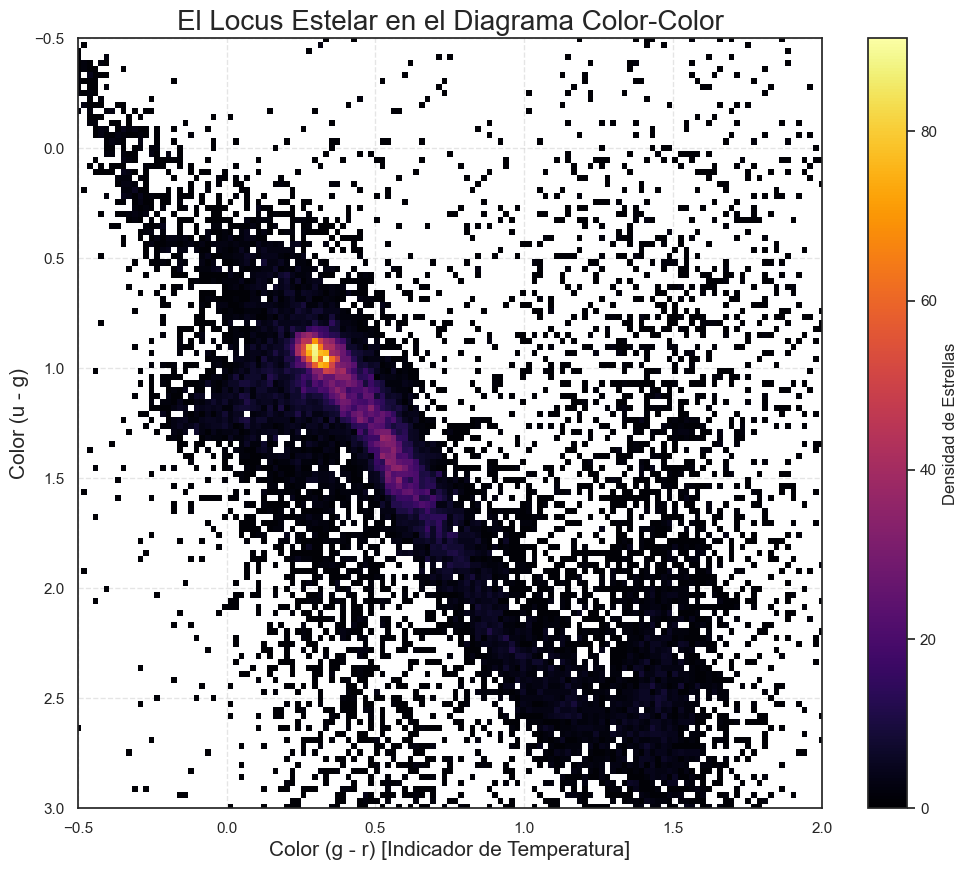

In [34]:
# --- 0. PREPARACIÓN E IMPORTACIONES ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Asumo que 'df_featured' está cargado.

# =========================================================================
#  1. FILTRADO Y LIMPIEZA DE DATOS (ENFOQUE EN ESTRELLAS)
# =========================================================================
print("\n--- Filtrando y limpiando datos para análisis exclusivo de ESTRELLAS ---")

# Paso 1: Seleccionar solo las estrellas
df_stars_only = df_featured[df_featured['class'] == 'STAR'].copy()
print(f"Dataset inicial con {len(df_stars_only)} estrellas.")

# Paso 2: Aplicar limpieza de outliers en los colores
limite_inferior_gr = -1.4175
limite_superior_gr = 3.3753
limite_inferior_ug = -2.0
limite_superior_ug = 5.0

df_stars_clean = df_stars_only[
    (df_stars_only['g-r'] > limite_inferior_gr) & 
    (df_stars_only['g-r'] < limite_superior_gr) &
    (df_stars_only['u-g'] > limite_inferior_ug) &
    (df_stars_only['u-g'] < limite_superior_ug)
]

print(f"Se graficarán {len(df_stars_clean)} estrellas tras la limpieza de outliers.")

# =========================================================================
#  2. GRÁFICO DE DENSIDAD DEL LOCUS ESTELAR (TODAS LAS ESTRELLAS)
# =========================================================================
print("\n--- Generando Diagrama de Densidad Color-Color del Locus Estelar ---")

plt.figure(figsize=(12, 10))
sns.set_theme(style="white")

# Usamos histplot 2D para mostrar la densidad de TODOS los puntos estelares
sns.histplot(
    data=df_stars_clean, # <--- Usando el DataFrame que contiene solo estrellas limpias
    x='g-r',
    y='u-g',
    bins=250,           # Bins finos para alta resolución
    cbar=True,
    cbar_kws={'label': 'Densidad de Estrellas'},
    cmap='inferno'      # 'inferno' es ideal para mostrar densidad
)

plt.title('El Locus Estelar en el Diagrama Color-Color', fontsize=20)
plt.xlabel('Color (g - r) [Indicador de Temperatura]', fontsize=15)
plt.ylabel('Color (u - g)', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.5)

# Límites ajustados para centrarse en el locus
plt.xlim(-0.5, 2.0)
plt.ylim(-0.5, 3.0)
plt.gca().invert_yaxis()
plt.show()

Análisis de clustering iniciado con 59103 galaxias.

--- Aplicando K-Means para encontrar 2 clusters (grupos)... ---

Color promedio de cada cluster:
cluster
0    0.886873
1    1.499761
Name: g-r, dtype: float64

--- Conteo de tipos de galaxias (Clasificación K-Means) ---
galaxy_type
Secuencia Roja    40465
Nube Azul         18638
Name: count, dtype: int64

--- Visualizando la clasificación K-Means en el CMD ---


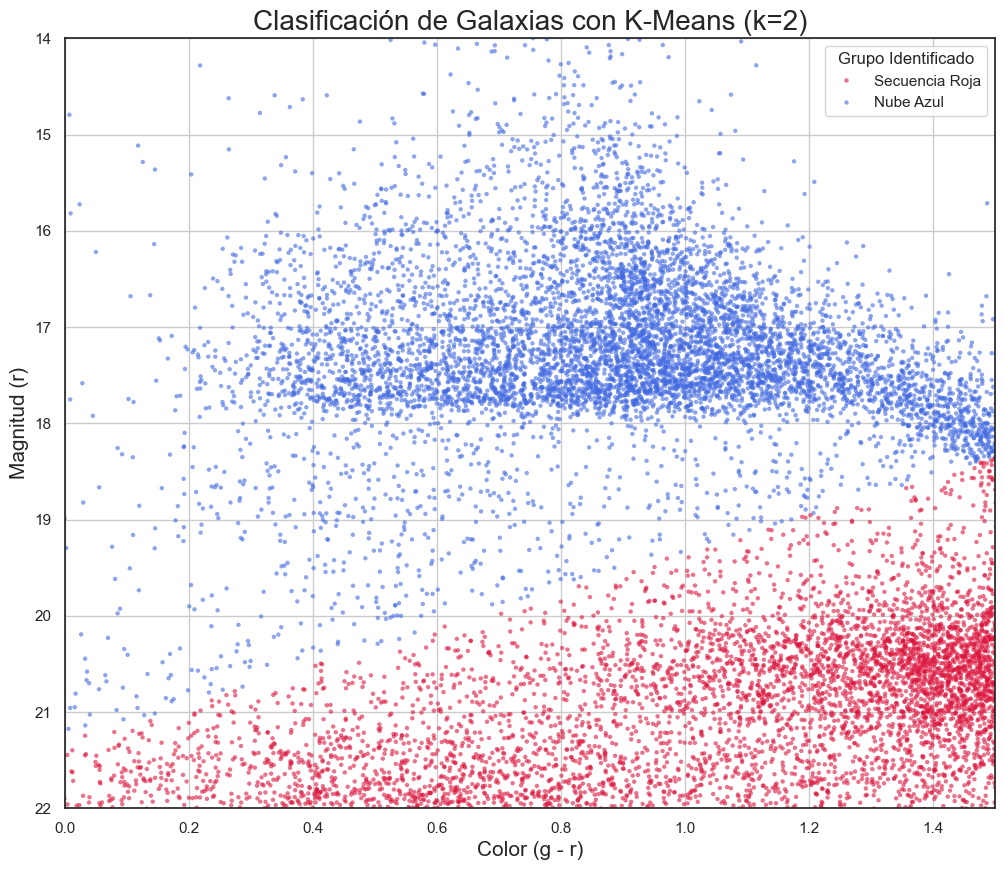

In [36]:
# --- 0. PREPARACIÓN E IMPORTACIONES ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Asumo que df_clean_cmd está disponible y limpio
df_galaxies = df_clean_cmd[df_clean_cmd['class'] == 'GALAXY'].copy()
print(f"Análisis de clustering iniciado con {len(df_galaxies)} galaxias.")

# =========================================================================
#  1. PREPARAR LOS DATOS PARA K-MEANS
# =========================================================================

# K-Means es sensible a la escala de las variables. El rango de 'r' (magnitudes)
# es mucho mayor que el de 'g-r' (colores). Debemos estandarizarlos.
features = ['g-r', 'r']
scaler = StandardScaler()
df_galaxies_scaled = scaler.fit_transform(df_galaxies[features])

# =========================================================================
#  2. APLICAR EL ALGORITMO K-MEANS
# =========================================================================
print("\n--- Aplicando K-Means para encontrar 2 clusters (grupos)... ---")

# Inicializamos el modelo para encontrar 2 grupos (k=2)
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')

# Entrenamos el modelo y obtenemos las etiquetas de cluster para cada galaxia
df_galaxies['cluster'] = kmeans.fit_predict(df_galaxies_scaled)

# =========================================================================
#  3. IDENTIFICAR Y ETIQUETAR LOS CLUSTERS
# =========================================================================

# Ahora necesitamos saber qué cluster es la 'Nube Azul' y cuál es la 'Secuencia Roja'.
# Lo hacemos calculando el color 'g-r' promedio de cada cluster.
# El cluster con el 'g-r' promedio más bajo será la Nube Azul.
cluster_centers_gr = df_galaxies.groupby('cluster')['g-r'].mean()
print("\nColor promedio de cada cluster:")
print(cluster_centers_gr)

blue_cluster_id = cluster_centers_gr.idxmin()
red_cluster_id = cluster_centers_gr.idxmax()

# Creamos la etiqueta final y legible
df_galaxies['galaxy_type'] = np.where(df_galaxies['cluster'] == blue_cluster_id,
                                      'Nube Azul',
                                      'Secuencia Roja')

print("\n--- Conteo de tipos de galaxias (Clasificación K-Means) ---")
print(df_galaxies['galaxy_type'].value_counts())

# =========================================================================
#  4. VISUALIZAR EL RESULTADO
# =========================================================================
print("\n--- Visualizando la clasificación K-Means en el CMD ---")

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_galaxies.sample(25000), # Muestra para un scatterplot claro
    x='g-r',
    y='r',
    hue='galaxy_type',
    palette={'Nube Azul': 'royalblue', 'Secuencia Roja': 'crimson'},
    s=10, alpha=0.6, edgecolor='none'
)

plt.gca().invert_yaxis()
plt.title('Clasificación de Galaxias con K-Means (k=2)', fontsize=20)
plt.xlabel('Color (g - r)', fontsize=15)
plt.ylabel('Magnitud (r)', fontsize=15)
plt.xlim(0, 1.5); plt.ylim(22, 14)
plt.legend(title='Grupo Identificado')
plt.grid(True)
plt.show()

Análisis iniciado con 59103 galaxias.
Clasificación de galaxias completada.

--- Generando el mapa del cielo para los tipos de galaxias ---


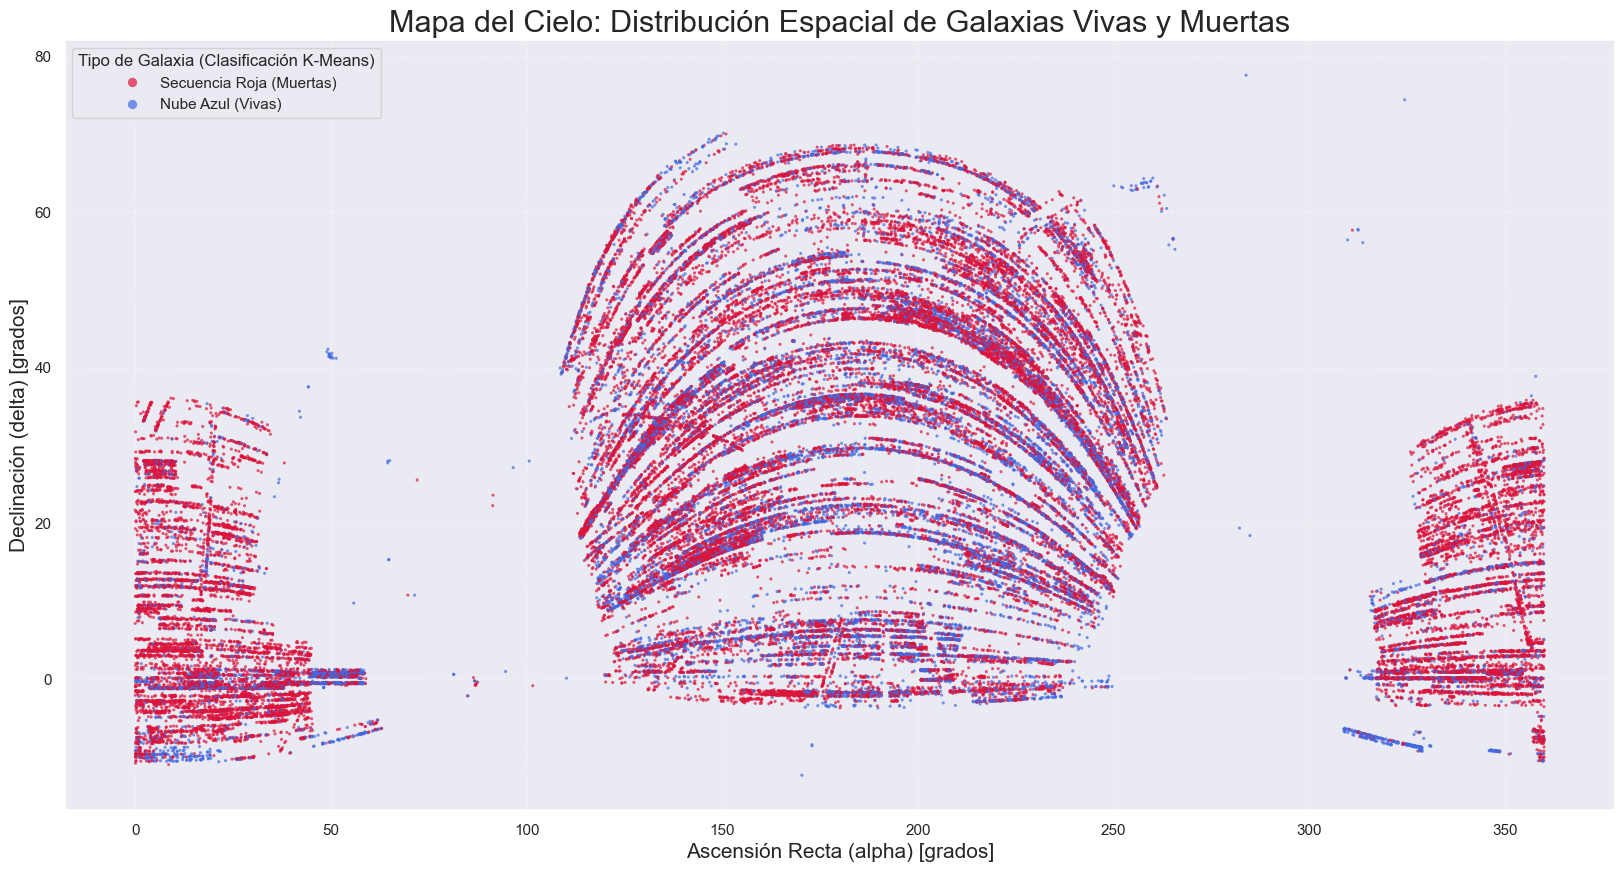

In [37]:
# --- 0. PREPARACIÓN E IMPORTACIONES ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- PASO CLAVE: Asegúrate de que 'df_clean_cmd' existe ---
# Este DataFrame es el que creamos anteriormente, sin outliers extremos en los colores.
# Si no lo tienes, debes crearlo primero a partir de 'df_featured'.
# Ejemplo de cómo crearlo si no existe:
try:
    df_clean_cmd
except NameError:
    print("DataFrame 'df_clean_cmd' no encontrado. Creándolo ahora...")
    # Límites que habíamos definido (físicos o estadísticos)
    color_min = -1.0
    color_max = 4.0
    df_clean_cmd = df_featured[(df_featured['g-r'] > color_min) & (df_featured['g-r'] < color_max)]


# =========================================================================
#  1. AISLAR GALAXIAS Y CLASIFICAR CON K-MEANS
# =========================================================================

# Filtramos para quedarnos solo con las galaxias
df_galaxies_full = df_clean_cmd[df_clean_cmd['class'] == 'GALAXY'].copy()
print(f"Análisis iniciado con {len(df_galaxies_full)} galaxias.")

# Preparar los datos para K-Means (estandarizar)
features = ['g-r', 'r']
scaler = StandardScaler()
df_galaxies_scaled = scaler.fit_transform(df_galaxies_full[features])

# Aplicar K-Means con k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
df_galaxies_full['cluster'] = kmeans.fit_predict(df_galaxies_scaled)

# Identificar y etiquetar los clusters
cluster_centers_gr = df_galaxies_full.groupby('cluster')['g-r'].mean()
blue_cluster_id = cluster_centers_gr.idxmin()
df_galaxies_full['galaxy_type'] = np.where(df_galaxies_full['cluster'] == blue_cluster_id,
                                           'Nube Azul (Vivas)',
                                           'Secuencia Roja (Muertas)')
print("Clasificación de galaxias completada.")


# =========================================================================
#  2. GENERAR EL FOOTPRINT / MAPA DEL CIELO
# =========================================================================
print("\n--- Generando el mapa del cielo para los tipos de galaxias ---")

plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")

sns.scatterplot(
    data=df_galaxies_full, # Ahora esta variable SÍ existe
    x='alpha',
    y='delta',
    hue='galaxy_type',
    palette={'Nube Azul (Vivas)': 'royalblue', 'Secuencia Roja (Muertas)': 'crimson'},
    s=5,
    alpha=0.7,
    edgecolor='none'
)

plt.title('Mapa del Cielo: Distribución Espacial de Galaxias Vivas y Muertas', fontsize=22)
plt.xlabel('Ascensión Recta (alpha) [grados]', fontsize=15)
plt.ylabel('Declinación (delta) [grados]', fontsize=15)
plt.legend(title='Tipo de Galaxia (Clasificación K-Means)', markerscale=3)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


--- Construyendo el DataFrame necesario desde 'df_featured' ---
Análisis iniciado con 78397 objetos extragalácticos limpios.
Conteo de clases en el DataFrame final:
class
GALAXY    59439
QSO       18958
Name: count, dtype: int64

--- Generando el gráfico de Brillo Aparente vs. Redshift ---


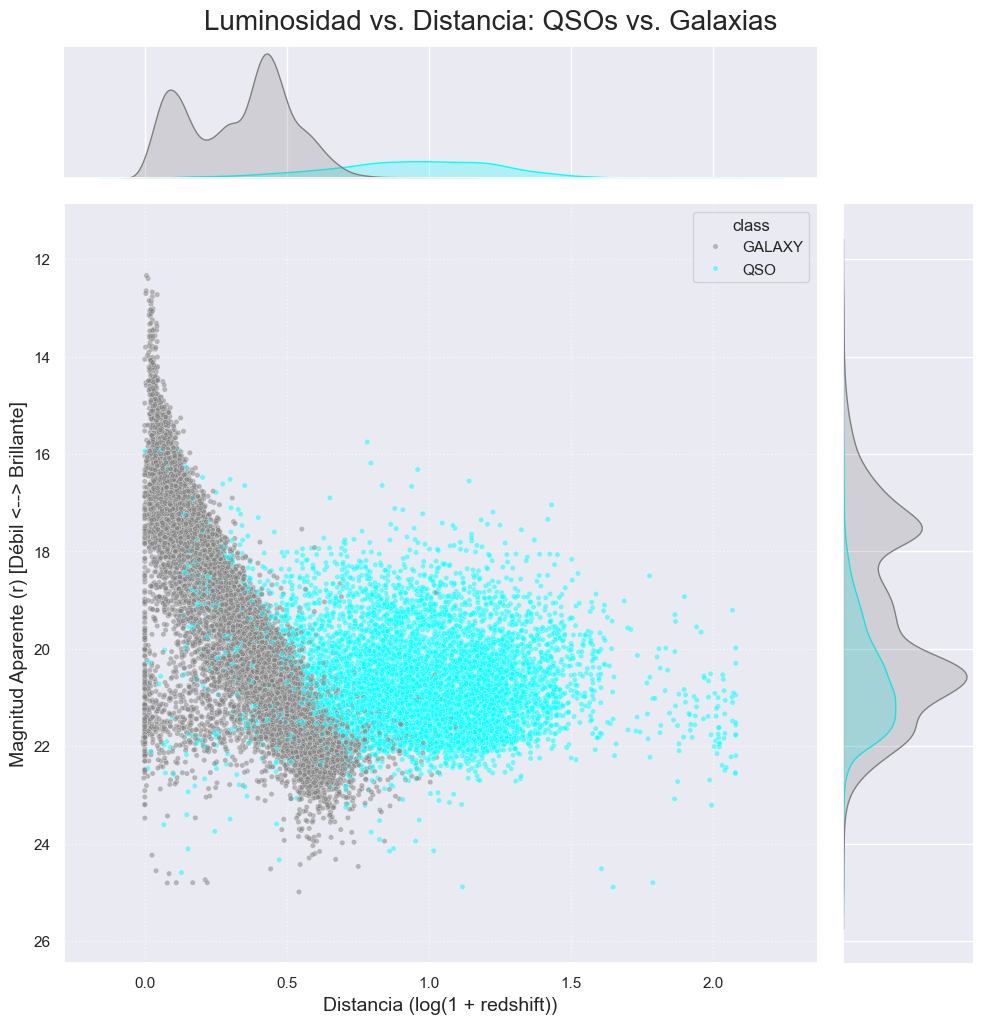


--- Comparación Cuantitativa en un Rango de Redshift Común (z=0.5 a 2.0) ---
Magnitud 'r' promedio de Galaxias: 21.11
Magnitud 'r' promedio de QSOs:      20.65
Diferencia: En promedio, los QSOs en este rango son 0.47 magnitudes más brillantes.


In [38]:
# --- 0. PREPARACIÓN E IMPORTACIONES ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# =========================================================================
#  1. CONSTRUIR EL DATAFRAME DESDE CERO (A PRUEBA DE ERRORES)
# =========================================================================
print("\n--- Construyendo el DataFrame necesario desde 'df_featured' ---")

# Asumimos que 'df_featured' es el DataFrame principal con todas las clases y columnas
# ('class', 'r', 'redshift_log', etc.)

# Paso 1: Seleccionar solo las clases que nos interesan (GALAXY y QSO)
df_extragalactic = df_featured[df_featured['class'].isin(['GALAXY', 'QSO'])].copy()

# Paso 2: Aplicar una limpieza básica para el gráfico. 
# Esto es para evitar posibles valores extremos en 'r' o 'redshift_log' que rompan la escala.
# Son límites muy generosos.
r_min, r_max = 10, 25
redshift_log_min, redshift_log_max = -1, 2.5

df_extragalactic = df_extragalactic[
    (df_extragalactic['r'] > r_min) & (df_extragalactic['r'] < r_max) &
    (df_extragalactic['redshift_log'] > redshift_log_min) & (df_extragalactic['redshift_log'] < redshift_log_max)
]

print(f"Análisis iniciado con {len(df_extragalactic)} objetos extragalácticos limpios.")
print("Conteo de clases en el DataFrame final:")
print(df_extragalactic['class'].value_counts())

# =========================================================================
#  2. CREAR EL GRÁFICO CONJUNTO (JOINTPLOT)
# =========================================================================
print("\n--- Generando el gráfico de Brillo Aparente vs. Redshift ---")

# 'jointplot' de seaborn es perfecto para esto.
# Tomamos una muestra para que el scatter plot central sea claro.
# Si el número de puntos es menor que 30000, usará todos los puntos.
sample_size = min(30000, len(df_extragalactic))
df_sample = df_extragalactic.sample(n=sample_size, random_state=42)

g = sns.jointplot(
    data=df_sample, 
    x='redshift_log', 
    y='r', 
    hue='class',
    palette={'GALAXY': 'gray', 'QSO': 'cyan'},
    height=10,
    s=15,
    alpha=0.5
)

# Mejoramos las etiquetas y el título
g.set_axis_labels('Distancia (log(1 + redshift))', 'Magnitud Aparente (r) [Débil <--> Brillante]', fontsize=14)
g.fig.suptitle('Luminosidad vs. Distancia: QSOs vs. Galaxias', fontsize=20, y=1.02)

# Invertimos el eje Y para que los objetos más brillantes estén arriba
g.ax_joint.invert_yaxis()
g.ax_joint.grid(True, linestyle=':', alpha=0.6)

plt.show()

# =========================================================================
#  3. ANÁLISIS CUANTITATIVO
# =========================================================================
# Usamos el DataFrame completo (no la muestra) para el cálculo.
common_redshift_range = (df_extragalactic['redshift_log'] > 0.4) & (df_extragalactic['redshift_log'] < 1.1)

# Usamos .loc para evitar warnings de indexación
galaxies_common = df_extragalactic.loc[(df_extragalactic['class'] == 'GALAXY') & common_redshift_range]
qsos_common = df_extragalactic.loc[(df_extragalactic['class'] == 'QSO') & common_redshift_range]

# Comprobamos si hay datos en el rango antes de calcular la media
if not galaxies_common.empty and not qsos_common.empty:
    mean_r_galaxy_common = galaxies_common['r'].mean()
    mean_r_qso_common = qsos_common['r'].mean()

    print("\n--- Comparación Cuantitativa en un Rango de Redshift Común (z=0.5 a 2.0) ---")
    print(f"Magnitud 'r' promedio de Galaxias: {mean_r_galaxy_common:.2f}")
    print(f"Magnitud 'r' promedio de QSOs:      {mean_r_qso_common:.2f}")
    print(f"Diferencia: En promedio, los QSOs en este rango son {mean_r_galaxy_common - mean_r_qso_common:.2f} magnitudes más brillantes.")
else:
    print("\nNo se encontraron suficientes datos de ambas clases en el rango de redshift común para el análisis cuantitativo.")


--- Preparando los datasets para la comparación de perfiles de color ---
Comparando 18961 QSOs, 12078 Galaxias Azules y 10063 Estrellas Azules.

--- Generando el gráfico de perfiles de color ---


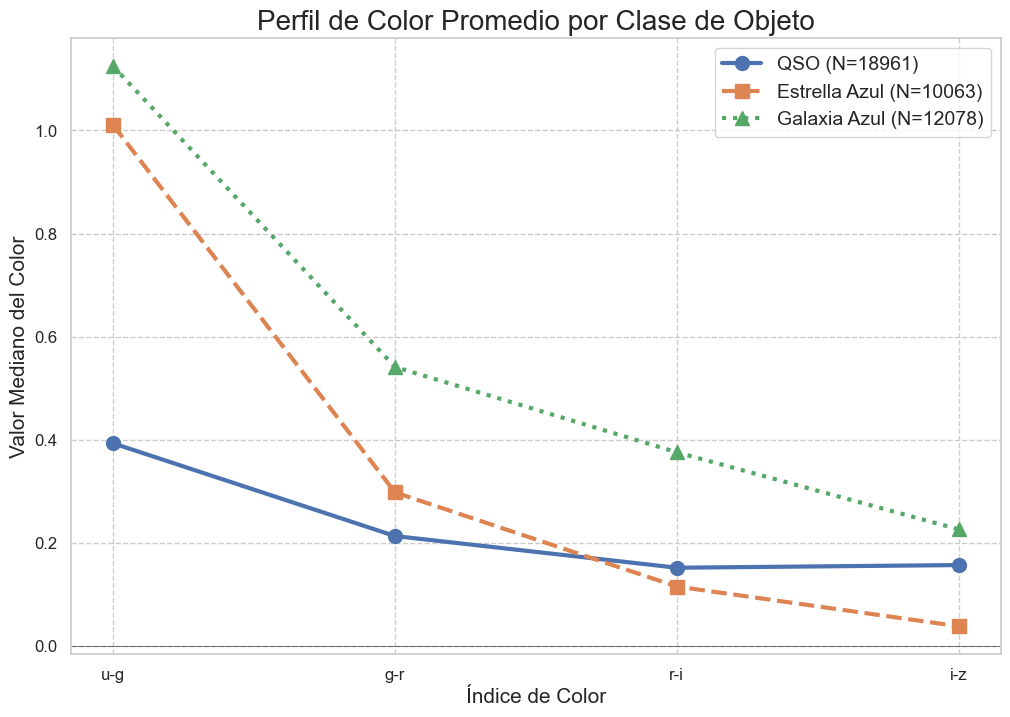

In [39]:
# --- 0. PREPARACIÓN E IMPORTACIONES ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Asumimos que 'df_featured' está disponible con todas las clases y colores.

# =========================================================================
#  1. PREPARAR LOS DATAFRAMES PARA LA COMPARACIÓN
# =========================================================================
print("\n--- Preparando los datasets para la comparación de perfiles de color ---")

# a) QSOs
df_qso = df_featured[df_featured['class'] == 'QSO'].copy()

# b) Galaxias de la Nube Azul (usamos el corte simple g-r < 0.8)
df_galaxies = df_featured[df_featured['class'] == 'GALAXY'].copy()
df_blue_galaxies = df_galaxies[df_galaxies['g-r'] < 0.8]

# c) Estrellas Azules (para una comparación justa, tomamos estrellas con g-r similar a los QSOs)
df_stars = df_featured[df_featured['class'] == 'STAR'].copy()
df_blue_stars = df_stars[(df_stars['g-r'] > -0.5) & (df_stars['g-r'] < 0.5)]

print(f"Comparando {len(df_qso)} QSOs, {len(df_blue_galaxies)} Galaxias Azules y {len(df_blue_stars)} Estrellas Azules.")

# =========================================================================
#  2. CALCULAR EL PERFIL DE COLOR MEDIANO
# =========================================================================
colores = ['u-g', 'g-r', 'r-i', 'i-z']

# Calculamos la mediana de cada color para cada clase
median_profile_qso = df_qso[colores].median()
median_profile_blue_galaxy = df_blue_galaxies[colores].median()
median_profile_blue_star = df_blue_stars[colores].median()

# =========================================================================
#  3. VISUALIZAR LOS PERFILES
# =========================================================================
print("\n--- Generando el gráfico de perfiles de color ---")

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Graficamos cada perfil como una línea
plt.plot(median_profile_qso.index, median_profile_qso.values, 
         marker='o', markersize=10, linestyle='-', linewidth=3, 
         label=f'QSO (N={len(df_qso)})')

plt.plot(median_profile_blue_star.index, median_profile_blue_star.values, 
         marker='s', markersize=10, linestyle='--', linewidth=3, 
         label=f'Estrella Azul (N={len(df_blue_stars)})')

plt.plot(median_profile_blue_galaxy.index, median_profile_blue_galaxy.values, 
         marker='^', markersize=10, linestyle=':', linewidth=3, 
         label=f'Galaxia Azul (N={len(df_blue_galaxies)})')

plt.title('Perfil de Color Promedio por Clase de Objeto', fontsize=20)
plt.xlabel('Índice de Color', fontsize=15)
plt.ylabel('Valor Mediano del Color', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.grid(True, which='both', linestyle='--')
# Añadimos una línea en y=0 para referencia
plt.axhline(0, color='black', linewidth=0.5, alpha=0.7)

plt.show()

Análisis Detallado del Gráfico de Perfil de Color

    Línea Verde (Galaxia Azul): El Promedio de una Población

        Observación: Es la línea más "roja" de las tres (tiene los valores de color más altos en general). Muestra una pendiente decreciente suave.

        Interpretación Física: Esto es exactamente lo que se espera de una galaxia. Su luz no es la de un solo objeto, sino el promedio de miles de millones de estrellas de diferentes edades y temperaturas, además del efecto del gas y el polvo. Aunque la llamamos "azul", en comparación con una estrella azul individual o un QSO, es relativamente más roja porque contiene muchas estrellas viejas y rojas que "contaminan" su color promedio.

    Línea Naranja (Estrella Azul): El Cuerpo Negro Térmico

        Observación: Esta línea muestra la pendiente más pronunciada. Empieza muy "roja" en u-g y se vuelve muy "azul" (valor cercano a cero) en i-z.

        Interpretación Física: Este es el comportamiento clásico de un cuerpo negro térmico. La forma de esta curva está directamente dictada por la física de cómo una estrella caliente emite luz. La diferencia entre el brillo en la banda u y la banda g es grande (alto valor u-g), pero la diferencia entre i y z (ambas en el infrarrojo cercano) es muy pequeña para una estrella azul. La curva es suave y predecible.

    Línea Azul (QSO): La Firma del Agujero Negro

        Observación: ¡Esta es la línea más interesante y anómala!

            En u-g, es mucho más azul que la estrella y la galaxia. Su valor u-g es el más bajo de todos.

            Luego, a diferencia de la estrella, su perfil se aplana drásticamente. Entre r-i y i-z, el color apenas cambia. La línea es casi horizontal al final.

        Interpretación Física: Este perfil único es la "huella digital" de un QSO.

            El u-g bajo: Se debe a la intensa radiación ultravioleta (UV) emitida por el disco de acreción sobrecalentado que gira alrededor del agujero negro. Este "exceso de UV" es la señal principal que se usa para encontrar QSOs.

            El aplanamiento en r-i e i-z: La luz de un QSO no es puramente térmica. Está contaminada por fuertes y anchas líneas de emisión (picos de luz en longitudes de onda específicas). Estas líneas pueden "rellenar" el espectro en la parte roja/infrarroja, haciendo que la diferencia de brillo entre las bandas r, i, y z sea menos pronunciada que en una estrella. La luz es "no-térmica".